[latex_cheat_sheet](http://tug.ctan.org/info/latex-refsheet/LaTeX_RefSheet.pdf)  
[latex_cheat_sheet_2](https://wch.github.io/latexsheet/)

<center style='font-size:220%'>Music and Guitar

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import notebook_helpers as nh

import pandas as pd # delete later

In [2]:
import noodler

Notes:  
 - All formulae should be in metric 
 - Avoid prefixes
 - Music is about opinions and this notebook is full of mine, be your own judge on your path

<center><h1>Music Scales

<center><h2>Fundamentals

<center><h3>Sharps and Flats

Western scales are generally in semitones.  
Quarter steps are ignored/commonly found in Eastern music

A note can either be flat, sharp, or natural  
Sharp _notes are higher in pitch than their natural counterparts  
Flat _notes are lower in pitch than their natural counterparts  

The term *enharmonic* refers to _notes that are the same fundamentally, but have different naming conventions.   
For example, G# == Fb (for an equal temperment tuning, which is what we're going to work with).  
*TODO explain equal temperment. This is the second time I wrote this TODO.   
Should probably, ya know, do it?*

<center style='font-size:140%'>What to remember
    
|   |  Symbol 	|   Pitch (relative to natural/normal)	|   	|
|---	|---	|---	|---	|
|  Sharp 	|  # 	|   up	|   	|
|   Flat	|   b	|   down	|   	|

I'm sure there's a good reason they both exist, but I prefer sharps as they are visually easier to indicate.  
If you like flats more, then I'd say you aren't the *sharpest* tool in the shed. See what I did there? Get it? It's a real knee slapper for ya!

In [3]:
noodler.musack._notes

['a', 'a#', 'b', 'c', 'c#', 'd', 'd#', 'e', 'f', 'f#', 'g', 'g#']

In [4]:
noodler._make_note_list('g#')

['g#', 'a', 'a#', 'b', 'c', 'c#', 'd', 'd#', 'e', 'f', 'f#', 'g']

In [5]:
noodler._make_note_list('g#',only_natural=True)

['a', 'b', 'c', 'd', 'e', 'f', 'g']

Keep in mind the musical alphabet doesn't follow lexicographical/typical alphabetical order.  
The musical alphabet starts at C and ends on B.  
So to get the musical alphabet, we can use the above function, `_make_note_list`  
But pass it the letter `C` to start the list and thus alphabet, there:

In [6]:
noodler._make_note_list('c')

['c', 'c#', 'd', 'd#', 'e', 'f', 'f#', 'g', 'g#', 'a', 'a#', 'b']

Two convenience functions for ingesting a note and converting it to/from a sharp (#) or flat (b)

In [7]:
noodler._sharp_to_flat('G#')

'ab'

In [8]:
noodler._flat_to_sharp('ab')

'g#'

<center><h3>Syntax/Naming Conventions

In music world, things (whether it be _notes, chords, scales, etc.) follow a couple rules of thumb:
- if the letter `m` or a roman numeral is capitolized, it is major/happy
  - as if opposed to those other ones that are socialized and sad/unhappy
    - these are commonly referred to as "lower class" or "lower case" and are minor
    
For example, if you see something like `m3`, it would be a minor third

In [9]:
noodler.musack._roman_dict

{1: 'i', 2: 'ii', 3: 'iii', 4: 'iv', 5: 'v', 6: 'vi', 7: 'vii'}

Throughout this notebook/library,  
When referring to _notes, we can use either:
- just note name 
  - ex: g, a#, fb
- scientific pitch notation
  - these are note name followed by the octave
  - ex: g3, a4, c#-1
  
Below is a function that makes dealing with them simple.  
It splits the note and returns a `tuple` [python object for holding things] that contains note name and octave.  
If there is no octave, octave is replace with `None`

In [10]:
noodler.split_note('g3')

('g', 3)

<center><h2>Note to Frequency

Using standard A is 440Hz.  
Defined by an ISO standard if you care  
This is the A note *above* middle C  
Middle C is C in the 3rd octave or C3.  
So A 440Hz, is A4. 

In [11]:
a4 = 440

Octave means frequency doubles.  
So A5 is:

In [12]:
a5 = a4*2
a5

880

There is equal spacing (frequency wise) between the 12 _notes  
I think this is why it's called equal tempormant or something like that?  
Should double check  
So the ratio between _notes is equal:

TODO Describe difference to just tempormant

> $\frac{f1}{f0}={r}$  

and

> $\frac{f2}{f1}={r}$ 

and

> $\frac{f2}{f0}={r}^{2}$ 

If you keep following this/solve it out,  
this becomes a power series where  
> $\frac{f12}{f0}={r}^{12}$

Since we know the 12th note is an octave, and an octave means a doubling of frequency,  
We now can say:  
> $\frac{f12}{f0}={r}^{12}={2}$

So:

> ${r}={2}^\frac{1}{12}$  
or  
> ${r}=\sqrt[12]{2}$  

Reference: [twelth root of two](https://en.wikipedia.org/wiki/Twelfth_root_of_two)

So getting a new frequency using this ratio would give:
> $f_{new}={f_0}\cdot{r}$

To get the frequency at a new note, if we know the distance in semitones from the fundamental $n$, we can derive $r$ as:
> ${r}={2}^\frac{n}{12}$  

In [13]:
noodler.r

1.0594630943592953

In [14]:
noodler.magic_number

17.817153745105756

TODO where did this magic number come from?  
As in, why the tits is it here?

Using 440Hz as our fundamental, $f_0$ we can now right it as:
> $f_{new}={440}\cdot{2}^\frac{n}{12}$  

Remember 440 is A4, but the musical alphabet starts at C, so we must take into account that C is actually 9 semitones from the next octaves A  

> $f_{new}={440}\cdot{2}^\frac{(n-9)}{12}$

In [15]:
noodler.note_to_frequency('a',4)

440.0

In [16]:
noodler.note_to_frequency('e',2)

82.4068892282175

In [17]:
noodler.note_to_frequency('e',6)

1318.5102276514797

In [18]:
noodler.note_to_frequency('a',-1)

13.75

In [19]:
noodler.note_to_frequency('a4')

440.0

In [20]:
noodler.note_to_frequency('a0')

27.5

In [21]:
noodler.note_to_frequency('d9')

9397.272573357044

In [22]:
noodler.note_to_frequency('e9')

10548.081821211836

In [23]:
noodler.note_to_frequency('e10')

21096.16364242367

In [24]:
noodler.note_to_frequency('a10')

28160.0

In [25]:
noodler.note_to_frequency("a#-1")

14.567617547440307

In [26]:
noodler.note_to_frequency('a#4')

466.1637615180899

So there are about 9 octaves of audible sound

<center><h3>Step sizes

Semitone step sizes:    
Think going from a sharp to a natural is a _half step, or distance of 1

In [27]:
noodler._whole_step

2

In [28]:
noodler._half_step

1

<center><h2>Intervals

In the following dict, the useful intervals used are listed  
Note use of P, it stands for perfect.  
There's some ratio that attempts to rationalize why they are 'perfect'.  
Should probably put that here. 

Fun fact:  
Playing a tritone was banned in church's at one point in time. People thought that this unpleasant interval was witch craft and an attempt to summon the devil.  

In [29]:
noodler.intervals

{'u': 0,
 'm2': 1,
 'M2': 2,
 'm3': 3,
 'M3': 4,
 'P4': 5,
 'T': 6,
 'P5': 7,
 'm6': 8,
 'M6': 9,
 'm7': 10,
 'M7': 11,
 'o': 12,
 0: 'u',
 1: 'm2',
 2: 'M2',
 3: 'm3',
 4: 'M3',
 5: 'P4',
 6: 'T',
 7: 'P5',
 8: 'm6',
 9: 'M6',
 10: 'm7',
 11: 'M7',
 12: 'o'}

`_decompose_interval`

In [30]:
noodler._decompose_interval("M3")

['_whole', '_whole']

`notes_for_interval`

In [31]:
noodler.notes_for_interval('G','M7')

['g', 'f#']

`interval_for_notes`

In [32]:
noodler.interval_for_notes('f5','f6')

'u+o'

In [33]:
noodler.interval_for_notes('c3','b3')

'M7'

In [34]:
noodler.interval_for_notes('b','d')

'm3'

`add_interval`

In [35]:
noodler.add_interval('g',3)

'a#'

In [36]:
noodler.add_interval('g#2','m7')

'f#3'

In [37]:
noodler.add_interval('b2','M2')

'c#3'

In [38]:
noodler.add_interval('b2','M2+o')

'c#4'

In [39]:
noodler.add_interval('b2','-M2-o')

'a1'

<center><h2>Circle of Fifths

Gives an easy to follow cheat sheet on making music

In [40]:
circ, order = noodler.make_circle_of_fifths()
print('circle of fifths: ',circ)
print('order of _notes to become sharp: ',order)

circle of fifths:  ['c', 'g', 'd', 'a', 'e', 'b', 'f#']
order of _notes to become sharp:  ['f', 'c', 'g', 'd', 'a', 'e', 'b']


Lets say we want to know about the key of E major:

In [41]:
circ.index('e')

4

So we need 4 _notes to become sharp.  
Now lets use the same circle and determine what those _notes are:

In [42]:
order[:circ.index('e')]

['f', 'c', 'g', 'd']

Go look up the key of E major. 10 doll hairs says f, c, g, and d are made sharp.

You can go the other direction and make the circle out of fourths.  
This is the wrong direction though as it gives you how to make scales with flats.  

In [43]:
circ, order = noodler.make_circle_of_fourths()
print('circle of fourths: ',circ)
print('order of _notes to become flat: ',order)

circle of fourths:  ['c', 'f', 'bb', 'eb', 'ab', 'db', 'gb']
order of _notes to become flat:  ['b', 'e', 'a', 'd', 'g', 'c', 'f']


Lets say we want to know about the key of Ab major:

In [44]:
circ.index('ab')

4

So we need 4 _notes to become flat.  
Now lets use the same circle and determine what those _notes are:

In [45]:
order[:circ.index('ab')]

['b', 'e', 'a', 'd']

<center><h2>Scales

Most scales are 8 long  
Take your bebop elsewhere troll

In [46]:
noodler.scales

{'major': {'intervals': [2, 2, 1, 2, 2, 2, 1],
  'modes': ['ionian',
   'dorian',
   'phrygian',
   'lydian',
   'mixolydian',
   'aeolian',
   'locrian'],
  'numerals': ['M', 'm', 'm', 'M', 'M', 'm', 'm,o']},
 'minor': {'intervals': [2, 1, 2, 2, 1, 2, 2],
  'modes': ['aeolian',
   'locrian',
   'ionian',
   'dorian',
   'phrygian',
   'lydian',
   'mixolydian'],
  'numerals': ['m', 'm,o', 'M', 'm', 'm', 'M', 'M']}}

In [47]:
noodler.get_numerals_of_scale('minor')

['i', 'iio', 'III', 'iv', 'v', 'VI', 'VII']

In [48]:
noodler.get_scale_of_mode('dorian')

{'intervals': [2, 1, 2, 2, 2, 1, 2],
 'modes': ['dorian',
  'phrygian',
  'lydian',
  'mixolydian',
  'aeolian',
  'locrian',
  'ionian'],
 'numerals': ['m', 'm', 'M', 'M', 'm', 'm,o', 'M']}

In [49]:
noodler.make_scale(('g#','phrygian'))

['g#', 'a', 'b', 'c#', 'd#', 'e', 'f#']

In [50]:
noodler.make_scale(('e','minor'))

['e', 'f#', 'g', 'a', 'b', 'c', 'd']

Look a function can now make a scale for us.  
This is exactly what artificial intelligence is.  
We are teaching a program to learn how to make music.  

In [51]:
noodler.get_major_scale_by_circle('g')

['g', 'a', 'b', 'c', 'd', 'e', 'f#']

<center><h2>Chords

Starting with just triads  
Will expand once I know where to go with this stuff

In [52]:
noodler.chords_df

intervals      numbers  chord_type
major       (M3, P5)    (1, 3, 5)       major
minor       (m3, P5)   (1, 3b, 5)       minor
diminished   (m3, T)  (1, 3b, 5b)  diminished
augmented    (M3, T)  (1, 3#, 5#)   augmented
sus2        (M2, P5)    (1, 2, 5)        sus2
sus4        (P4, P5)    (1, 4, 5)        sus4

In [53]:
noodler.make_chord(('g','minor'))

['g', 'a#', 'd']

<center><h3>Chords in a Key

Simplest way to find the root note for chords in a key is by use of the circle of fifths  
Here is a simple function that gets the 3 major chords in a major key by use of the circle of fifths  
Note: the 4(IV) and 5(V) chord root _notes are next to the keys root note on the circle of fifths. Pretty neat-o

In [54]:
noodler.get_chords_root_note_for_major_key_by_circle('e')

{'I': 'e', 'IV': 'b', 'V': 'a'}

A slightly more complicated function:  
This implies you know the order of major, minor, and diminished in a major key though. :(

In [55]:
noodler.get_chords_for_major_key('c')

{'I': ['c', 'e', 'g'],
 'ii': ['d', 'f', 'a'],
 'iii': ['e', 'g', 'b'],
 'IV': ['f', 'a', 'c'],
 'V': ['g', 'b', 'd'],
 'vi': ['a', 'c', 'e'],
 'viio': ['b', 'd', 'f']}

Make function to now find the chord given the intervals

In [56]:
noodler.get_chord_type_by_intervals(('m3','P5'))

'minor'

In [57]:
noodler.get_chord_type_by_intervals(('m3','P4'))

'Not Found'

Now make a function that can ingest _notes, find those intervals, then finds the chord type

In [58]:
noodler.get_chord_type(['g2','b2','d3'])

'major'

Get the chords in a given key.  
Horribly named.

In [59]:
noodler.get_chords_for_key(('g','major'))

{'I': ['g', 'b', 'd'],
 'ii': ['a', 'c', 'e'],
 'iii': ['b', 'd', 'f#'],
 'IV': ['c', 'e', 'g'],
 'V': ['d', 'f#', 'a'],
 'vi': ['e', 'g', 'b'],
 'viio': ['f#', 'a', 'c']}

In [60]:
noodler.get_chords_for_key(('f#','locrian'))

{'io': ['f#', 'a', 'c'],
 'II': ['g', 'b', 'd'],
 'iii': ['a', 'c', 'e'],
 'iv': ['b', 'd', 'f#'],
 'V': ['c', 'e', 'g'],
 'VI': ['d', 'f#', 'a'],
 'vii': ['e', 'g', 'b']}

<center><h2>Keys

In [61]:
noodler.make_key(('f#','locrian'))

note numeral chord_triad        type        mode
1   f#      io  [f#, a, c]  diminished     locrian
2    g      II   [g, b, d]       major      ionian
3    a     iii   [a, c, e]       minor      dorian
4    b      iv  [b, d, f#]       minor    phrygian
5    c       V   [c, e, g]       major      lydian
6    d      VI  [d, f#, a]       major  mixolydian
7    e     vii   [e, g, b]       minor     aeolian

<center><h1>Guitar Modeling

TODO derive guitar tuning somehow here

In [62]:
noodler.tunings

{'standard': ['e2', 'a2', 'd3', 'g3', 'b3', 'e4']}

<center><h2>Coordinate System

For the purpose of this notebook and associated library,  
We are going to define the coordinate system of the guitar as:

|   Axis	|   Direction	|   Origin (0 index)	|   	
|---	|---	|---	|
|   X	|   from bridge to nut	|   Bridge	|   	
|   Y	|   from thinnest string to thickest string	|   Thinnest string	|   	
|   Z	|   from pickups looking towards strings above	|   Invisible line where action is 0	|   	

This keeps things right handed  
Following some intuition (plucking/strumming down is negative)  
Puts 0,0,0 at an ideal spot to calculate from

<center><h2>Rationalizing Guitar Dimensions

<center><h3>Fret Distance

reference: [STEM Guitar, Fret Module](https://drive.google.com/drive/folders/1MBi5mdN6x-j77abd2uoLcDZvzv2F-FCK)

`scale_length` is distance between the nut and bridge

In [63]:
noodler.scale_length # in m based off typical Fender length of 25.5"

0.6476999999999999

In [64]:
noodler.get_fret_distance(4)

-0.5140798306799013

In [65]:
noodler.get_fret_distances(21)

array([-0.6477    , -0.61134739, -0.5770351 , -0.54464861, -0.51407983,
       -0.48522675, -0.45799306, -0.43228789, -0.40802543, -0.38512472,
       -0.36350933, -0.34310712, -0.32385   , -0.3056737 , -0.28851755,
       -0.2723243 , -0.25703992, -0.24261337, -0.22899653, -0.21614394,
       -0.20401272, -0.19256236])

<center><h2>Strings

<center><h3>Action

Action is the distance between string and pickup/fretboard. 

This changes from high to low strings to offset thicker strings creating larger output signals


References:
 - [Fralin _notes on topic](https://www.fralinpickups.com/2019/02/17/how-to-properly-set-pickup-height/)

In [66]:
noodler.thickest_string_action

0.0031750063500127004

In [67]:
noodler.thinnest_string_action

0.0015875031750063502

In [68]:
noodler.action_per_string

array([0.00317501, 0.00285751, 0.00254001, 0.0022225 , 0.001905  ,
       0.0015875 ])

<center><h3>String Tension

References:  
 - [physics of sound synth](http://home.mit.bme.hu/~bank/phd/tbooklet.pdf)
 - [fletcher says](https://kupdf.net/download/fletcher_59aa86c8dc0d60477f568edd_pdf)
 - [Physics of instruments or some shit](http://kellerphysics.com/acoustics/Lapp.pdf)
 - [Notes on solving for tension of guitar string from wave equation](https://courses.physics.illinois.edu/phys406/sp2017/Student_Projects/Fall00/DAchilles/Guitar_String_Tension_Experiment.pdf)  
 - [Dumbed down method](https://www.dirkbertels.net/music/tension.php)  
 - [Sample Unit Weights for strings](https://www.daddario.com/globalassets/pdfs/accessories/tension_chart_13934.pdf)

Dig way back in your brain and remember:  
> ${\lambda}= \frac{v}{f}$  [1]   
>> ${\lambda}$: wavelength  
${v}$: velocity  
${f}$: frequency  

First mode of a string is $\frac{\lambda}{2}$

Length of the string is `scale_length` or ${L}$  

so 
> ${L} = \frac{\lambda}{2}$  

or 
> ${\lambda} = {2}{L}$ [2]

Solving for f in [1] and substituting ${\lambda}$ for ${2}{L}$, gives:

> ${f} = \frac{v}{{2}{L}}$ [3]


String wave velocity is defined as:  

> ${v}=\sqrt{\frac{T}{\mu}}$  [4]  
>>${v}$: velocity of string   
${T}$: tension of string (N)  
${\mu}$: linear mass density (kg/m)  

so:
> ${f}= \frac{1}{{2}{L}} \sqrt{\frac{T}{\mu}}$ [5]   
>>${f}$: frequency (Hz)  
${L}$: `scale_length` (cm)  
${T}$: tension (newtons)  
${\mu}$: linear mass density (kg/m) *called unit weight sometimes

Solving for tension gives:  
> ${T} = (({f}{2}{L})^{2}){\mu}$  

or simply:  
> ${T} = {v}^{2}{\mu}$ [6]

So by increasing the length of the neck of a guitar,  
the amount of tension needed to maintain a note/frequency  
is lowered pretty quickly

<center><h3>String Magnetic Properties

References:  
 1. [Ernie Ball patent on cobalt alloy](https://patents.google.com/patent/US8222504B1/en)
 2. [Magnetic field induced on strings](https://courses.physics.illinois.edu/phys406/sp2017/Lecture_Notes/Waves/PDF_FIles/Waves_2.pdf)

Goal is to have good magnetic permeability

"alloy is easily magnetized and demagnetized and/or has a high magnetic permeability with a high magnetic saturation level. Having a high magnetic permeability and a high magnetic saturation level allows the string to be highly responsive to strong magnetic fields and to thereby have increased output and wider dynamic range when used in an instrument having a magnetic pickup."[1]

<center><h3>String Gauges

When looking at string gauges, they are given in nice integers, like 10 or 52  
This represents the diameter and can be converted to a useful metric by:  
> ${d}={0.001}\cdot {g}$  
>>${d}$: diameter of the string in inches  
${g}$: given string "gauge"  

Then to get to meters simply multiply by `0.0254` giving the final formulae of:  
> ${d}={2.54\text{e-}5}\cdot{g}$  

In [69]:
noodler.string_gauges

{'heavy_bottom': [52, 42, 30, 17, 13, 10]}

In [70]:
noodler.string_gauge_to_meters(noodler.string_gauges['heavy_bottom'])

[0.0013208,
 0.0010668000000000001,
 0.000762,
 0.00043180000000000003,
 0.0003302,
 0.000254]

<center><h3>String Movement

In [71]:
np.sin((2*np.pi)/180)

0.03489949670250097

General Wave Equation:

> ${y(x,t)}= f_{right}(c\cdot t - x) + f_{left}(c\cdot t + x)$

> ${y(x,t)}=y_{init}\cdot\sin({\omega}{t}- kx) + y_{init}\cdot \sin({\omega}{t} + kx)$

Wave number:
> $k = \frac {\omega}{v} = \frac {2\pi}{\lambda} = \frac {\pi}{L}$

Use obscure trig identity you definitely remember off the top of your head:
> $sin(a)+sin(b)= 2sin(\frac {a+b}{2})cos(\frac {a-b}{2})$

$2sin(kx)cos(wt)$

Set constraints so that $y=0$ at $x=0$ and $x=-L$ (-L since x-axis points from nut to bridge)
so:
> $\sin( {-L}{k})=0$  

using $k=\frac {\pi}{L}$

> $\sin( {-n\pi})=0$ 

Normal Modes of String with Fixed Ends:

> $y(x,t) =(A_n\cdot\sin({\omega}_n{t}) + B_n\cdot\cos({\omega}_n{t}) ) \cdot \sin(\frac {{\omega}_n{x}}{v})$

Using the amplitude of nth mode being $C_n=\sqrt{{A_n}{B_n}} $
> $y = {\sum}C_n\sin({{\omega}_n}{t}+{\phi}_n)\cdot \sin({k_n}{x})$

Reference:
 - [Calculation method of perm mag for e gtr](https://hal.archives-ouvertes.fr/hal-00436999/document)

Movement about the y-axis:  
> ${y(t,x)}={Y}_{I}\cos{2}{\pi}{f}{t}\cdot\sin{{k}{x}}$  
>>${k}$: wave number   
${f}$: frequency of vibration  
${Y}_{I}$: initial amplitude
 
 
Movement about the z-axis:  
> ${z(t,x)}={Z}_{I}\cos{2}{\pi}{f}{t}\cdot\sin{{k}{x}} + {d}$  
>>${k}$: wave number  
${f}$: frequency of vibration  
${Z}_{I}$: initial amplitude  
${d}$: distance between string and pickup

In [88]:
yy.shape


(960000,)

In [90]:
import matplotlib.pyplot as plt

(array([6.50599708e-05, 5.89590587e-05, 1.75270205e-06, 4.77738951e-08,
        6.09438123e-09, 1.37970934e-09, 4.27102942e-10, 1.61473766e-10,
        7.02046996e-11, 3.38547388e-11, 1.76860249e-11, 9.84775016e-12,
        5.77629537e-12, 3.53810330e-12, 2.24796503e-12, 1.47375023e-12,
        9.92771232e-13, 6.84831313e-13, 4.82399226e-13, 3.46178810e-13,
        2.52585007e-13, 1.87067398e-13, 1.40425462e-13, 1.06711026e-13,
        8.20005621e-14, 6.36583243e-14, 4.98838704e-14, 3.94283716e-14,
        3.14133184e-14, 2.52126138e-14, 2.03746388e-14, 1.65699614e-14,
        1.35557595e-14, 1.11512994e-14, 9.22082946e-15, 7.66151014e-15,
        6.39480715e-15, 5.36029267e-15, 4.51113873e-15, 3.81081175e-15,
        3.23062780e-15, 2.74793009e-15, 2.34472014e-15, 2.00662231e-15,
        1.72209534e-15, 1.48182796e-15, 1.27827287e-15, 1.10528528e-15,
        9.57840943e-16, 8.31815143e-16, 7.23808444e-16, 6.31008742e-16,
        5.51081490e-16, 4.82081979e-16, 4.22384931e-16, 3.706277

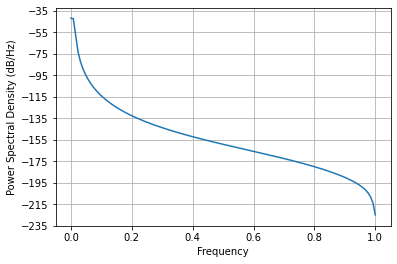

In [91]:
plt.psd(yy)

In [ ]:
from scipy import signal
import numpy as np

s=noodler.string_movement(noodler.tunings['standard'],l=48e3)

t = s[2][0]
yy = s[0][0]

f, Pxx_den = signal.welch(yy, 48e3, nperseg=1024)

plt.plot(f, 10*np.log10(Pxx_den))

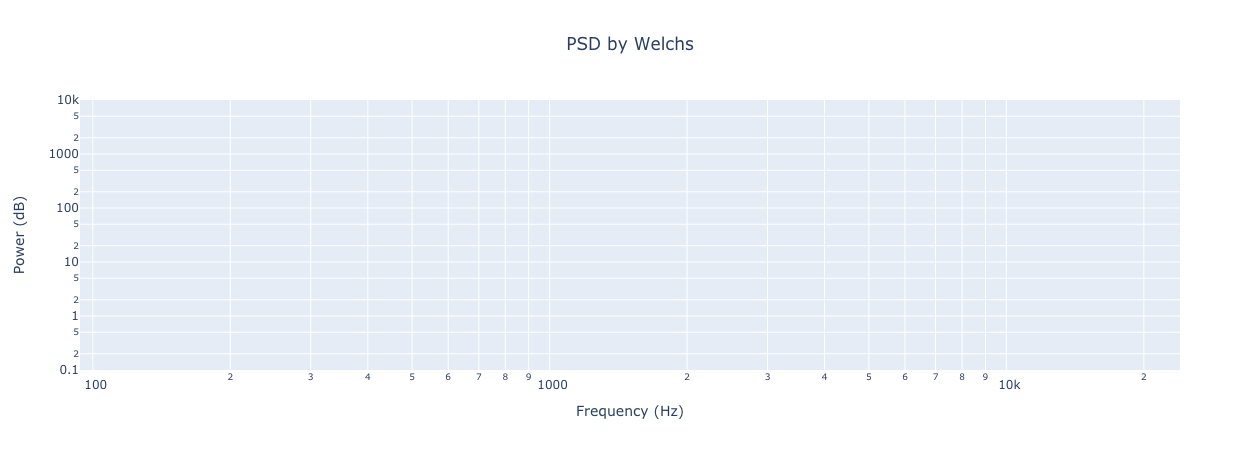

In [72]:
s=noodler.string_movement(noodler.tunings['standard'],l=20)

t = s[2][0]
yy = s[0][0]

nh.plot_freq(yy,fs=48e3,N=512)

[array([-1.40197704e-03, -1.40189548e-03, -1.40165079e-03, ...,
       -1.27214486e-04, -1.12146587e-04, -9.70656393e-05]), array([-0.00140198, -0.00140183, -0.0014014 , ..., -0.00140067,
       -0.0014014 , -0.00140183]), array([-0.00140198, -0.00140172, -0.00140094, ...,  0.00064384,
        0.00061979,  0.0005955 ]), array([-0.00140198, -0.00140152, -0.00140013, ...,  0.00119528,
        0.00117609,  0.00115613]), array([-0.00140198, -0.00140124, -0.00139905, ...,  0.00060703,
        0.00056587,  0.00052412]), array([-0.00140198, -0.00140067, -0.00139676, ..., -0.00131039,
       -0.00133067, -0.00134847])]


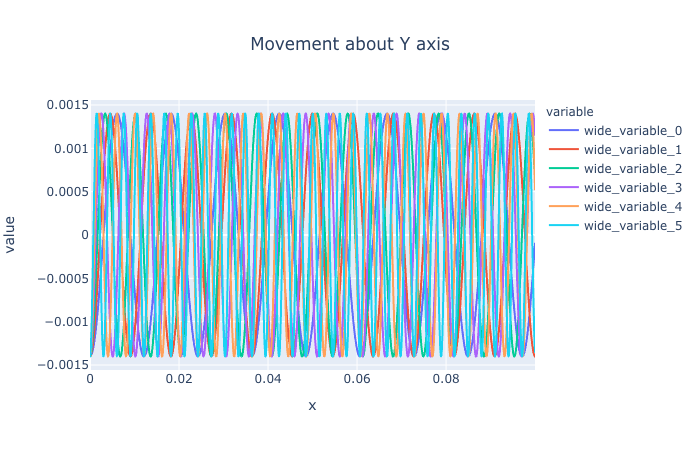

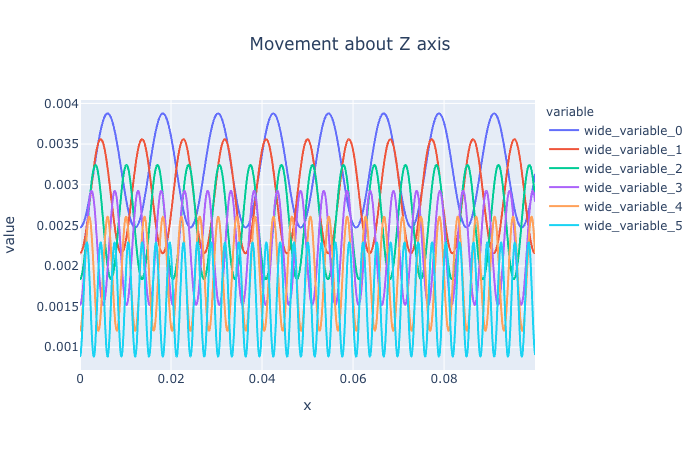

In [79]:
s=noodler.string_movement(noodler.tunings['standard'])

t = s[2][0]
yy = s[0]
print(yy)
z = s[1]

nh.quick_plot(yy, t, 'Movement about Y axis')
nh.quick_plot(z, t, 'Movement about Z axis')

<center><h2>Guitar Class: First Start

<center><h3>Parts: String Class

<center><h3>Basic Guitar Class

<center><h2>Using the <code>Guitar</code> Class

In [26]:
num_of_frets = 21
tuning = noodler.tunings['standard']
gauges = noodler.string_gauges['heavy_bottom']


gtr = noodler.Guitar(tuning, gauges, noodler.strings_and_frets.scale_length, num_of_frets, noodler.strings_and_frets.thickest_string_action, noodler.strings_and_frets.thinnest_string_action)

Making Guitar.

    Number of Strings:6
    Number of Frets:21
    Scale Length:0.6476999999999999
    Tuning:['e4', 'b3', 'g3', 'd3', 'a2', 'e2']
    Gauges:[10, 13, 17, 30, 42, 52]
    Action: Thinnest String: 0.0015875031750063502, Thickest String: 0.0031750063500127004


<center><h3>Viewing property of string

In [75]:
gtr.strings[1].properties

tuning  gauge    action  diameter          area  length   x_max  y_position  \
1     e4     10  0.001588  0.000254  5.067075e-08  0.6477  0.6477         0.0   

   z_position  
1    0.001588

In [76]:
gtr.frets.loc[gtr.frets['string_number'] == 3]

note fret string_number note_name note_octave frequency_fundamental  \
0    g3    0             3         g           3               195.998   
1   g#3    1             3        g#           3               207.652   
2    a3    2             3         a           3                   220   
3   a#3    3             3        a#           3               233.082   
4    b3    4             3         b           3               246.942   
5    c4    5             3         c           4               261.626   
6   c#4    6             3        c#           4               277.183   
7    d4    7             3         d           4               293.665   
8   d#4    8             3        d#           4               311.127   
9    e4    9             3         e           4               329.628   
10   f4   10             3         f           4               349.228   
11  f#4   11             3        f#           4               369.994   
12   g4   12             3         g           4               391.995   
13  g#4   13             3        g#           4               415.305   
14   a4   14             3         a           4                   440   
15  a#4   15             3        a#           4               466.164   
16   b4   16             3         b           4               493.883   
17   c5   17             3         c           5               523.251   
18  c#5   18             3        c#           5               554.365   
19   d5   19             3         d           5                587.33   
20  d#5   20             3        d#           5               622.254   

   x_position y_position                           position  
0     -0.6477  -0.020955   [-0.6476999999999999, -0.020955]  
1   -0.611347  -0.020955   [-0.6113473923239328, -0.020955]  
2   -0.577035  -0.020955   [-0.5770350997394977, -0.020955]  
3   -0.544649  -0.020955   [-0.5446486081598307, -0.020955]  
4    -0.51408  -0.020955   [-0.5140798306799013, -0.020955]  
5   -0.485227  -0.020955   [-0.4852267468465131, -0.020955]  
6   -0.457993  -0.020955   [-0.4579930621745267, -0.020955]  
7   -0.432288  -0.020955   [-0.4322878867729655, -0.020955]  
8   -0.408025  -0.020955  [-0.40802543200845454, -0.020955]  
9   -0.385125  -0.020955  [-0.38512472419363103, -0.020955]  
10  -0.363509  -0.020955   [-0.3635093343449902, -0.020955]  
11  -0.343107  -0.020955  [-0.34310712310825753, -0.020955]  
12   -0.32385  -0.020955  [-0.32384999999999975, -0.020955]  
13  -0.305674  -0.020955   [-0.3056736961619662, -0.020955]  
14  -0.288518  -0.020955  [-0.28851754986974865, -0.020955]  
15  -0.272324  -0.020955   [-0.2723243040799152, -0.020955]  
16   -0.25704  -0.020955  [-0.25703991533995046, -0.020955]  
17  -0.242613  -0.020955   [-0.2426133734232564, -0.020955]  
18  -0.228997  -0.020955  [-0.22899653108726314, -0.020955]  
19  -0.216144  -0.020955  [-0.21614394338648257, -0.020955]  
20  -0.204013  -0.020955   [-0.2040127160042271, -0.020955]

<center><h3>Viewing property of string at a specific fret

In [77]:
gtr.strings[1].at_fret[3]

note                                             g4
fret                                              3
string_number                                     1
note_name                                         g
note_octave                                       4
frequency_fundamental                       391.995
x_position                                -0.544649
y_position                                        0
position                 [-0.5446486081598307, 0.0]
Name: 3, dtype: object

<center><h3>Viewing all strings at a certain fret

viewing properties at a certain fret:

In [78]:
gtr.at_fret[2]

note fret string_number note_name note_octave frequency_fundamental  \
2  f#4    2             1        f#           4               369.994   
2  c#4    2             2        c#           4               277.183   
2   a3    2             3         a           3                   220   
2   e3    2             4         e           3               164.814   
2   b2    2             5         b           2               123.471   
2  f#2    2             6        f#           2               92.4986   

  x_position y_position                                      position  
2  -0.577035          0                    [-0.5770350997394977, 0.0]  
2  -0.577035 -0.0104775             [-0.5770350997394977, -0.0104775]  
2  -0.577035  -0.020955              [-0.5770350997394977, -0.020955]  
2  -0.577035 -0.0314325             [-0.5770350997394977, -0.0314325]  
2  -0.577035   -0.04191               [-0.5770350997394977, -0.04191]  
2  -0.577035 -0.0523875  [-0.5770350997394977, -0.052387500000000004]

or through the `DataFrame` manually:

In [79]:
gtr.frets.loc[2]

note fret string_number note_name note_octave frequency_fundamental  \
2  f#4    2             1        f#           4               369.994   
2  c#4    2             2        c#           4               277.183   
2   a3    2             3         a           3                   220   
2   e3    2             4         e           3               164.814   
2   b2    2             5         b           2               123.471   
2  f#2    2             6        f#           2               92.4986   

  x_position y_position                                      position  
2  -0.577035          0                    [-0.5770350997394977, 0.0]  
2  -0.577035 -0.0104775             [-0.5770350997394977, -0.0104775]  
2  -0.577035  -0.020955              [-0.5770350997394977, -0.020955]  
2  -0.577035 -0.0314325             [-0.5770350997394977, -0.0314325]  
2  -0.577035   -0.04191               [-0.5770350997394977, -0.04191]  
2  -0.577035 -0.0523875  [-0.5770350997394977, -0.052387500000000004]

<center><h3>Viewing all strings at all frets

In [80]:
gtr.frets

note fret string_number note_name note_octave frequency_fundamental  \
0    e4    0             1         e           4               329.628   
1    f4    1             1         f           4               349.228   
2   f#4    2             1        f#           4               369.994   
3    g4    3             1         g           4               391.995   
4   g#4    4             1        g#           4               415.305   
..  ...  ...           ...       ...         ...                   ...   
16  g#3   16             6        g#           3               207.652   
17   a3   17             6         a           3                   220   
18  a#3   18             6        a#           3               233.082   
19   b3   19             6         b           3               246.942   
20   c4   20             6         c           4               261.626   

   x_position y_position                                       position  
0     -0.6477          0                     [-0.6476999999999999, 0.0]  
1   -0.611347          0                     [-0.6113473923239328, 0.0]  
2   -0.577035          0                     [-0.5770350997394977, 0.0]  
3   -0.544649          0                     [-0.5446486081598307, 0.0]  
4    -0.51408          0                     [-0.5140798306799013, 0.0]  
..        ...        ...                                            ...  
16   -0.25704 -0.0523875  [-0.25703991533995046, -0.052387500000000004]  
17  -0.242613 -0.0523875   [-0.2426133734232564, -0.052387500000000004]  
18  -0.228997 -0.0523875  [-0.22899653108726314, -0.052387500000000004]  
19  -0.216144 -0.0523875  [-0.21614394338648257, -0.052387500000000004]  
20  -0.204013 -0.0523875   [-0.2040127160042271, -0.052387500000000004]  

[126 rows x 9 columns]

<center><h3>Viewing String Movment

Plotting per frets:

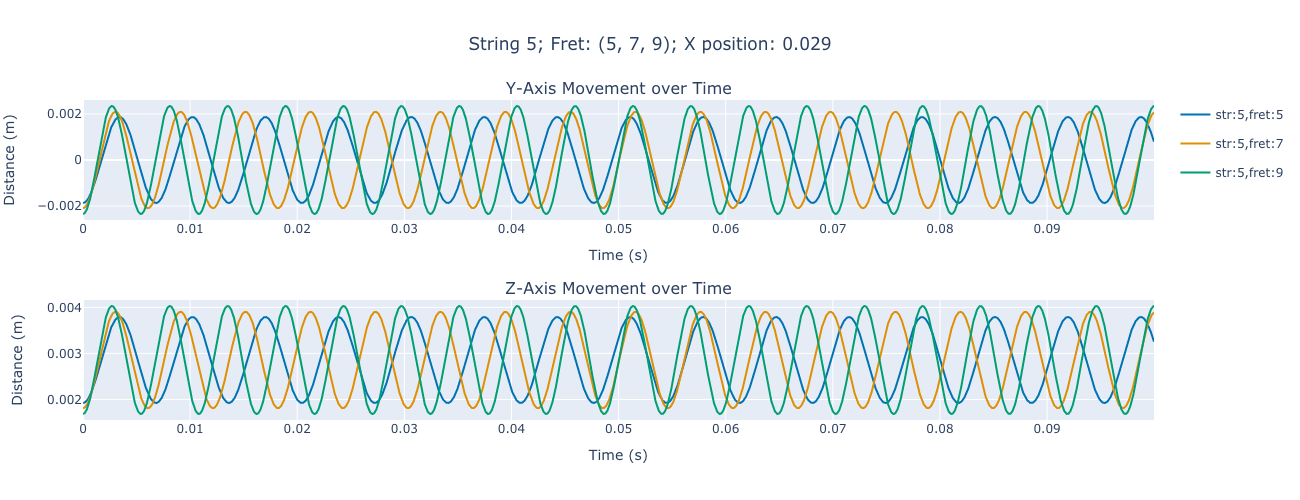

In [81]:
pluck_at_frets = (5,7,9)
gtr.strings[5].plot_pluck(pluck_at_frets)

Plotting plucks across strings and frets:

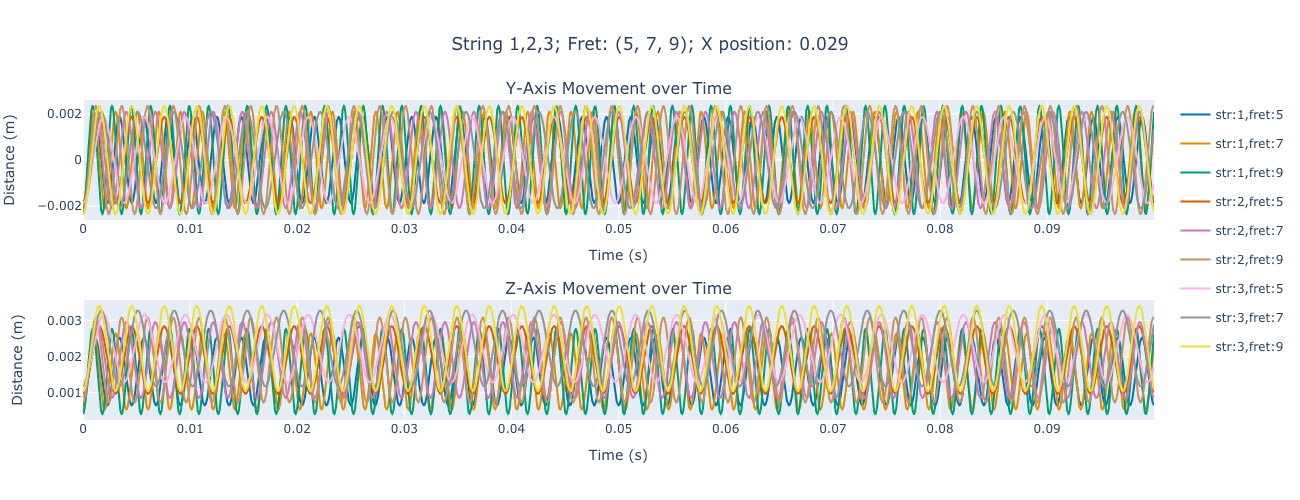

In [82]:
pluck_strings = (1,2,3)
gtr.plot_pluck(pluck_strings, pluck_at_frets)

<center><h3>Using the <code>DataFrame</code>s

In [83]:
df=gtr.strings[5].at_fret_df

Finding matches in a `DataFrame` column

This returns a `pd.Series` that is true where matches are found:

In [84]:
df['note_name'].str.fullmatch('g')

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10     True
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
Name: note_name, dtype: bool

Can check if the note is there by using the `.any` function:

In [85]:
df['note_name'].str.fullmatch('g').any()

True

Now pass that to the `pd.DataFrame` and bingo:

In [86]:
df[df['note_name'].str.fullmatch('g')]

note fret string_number note_name note_octave frequency_fundamental  \
10   g3   10             5         g           3               195.998   

   x_position y_position                         position  
10  -0.363509   -0.04191  [-0.3635093343449902, -0.04191]

Getting info on a specific fret:

In [87]:
df.loc[2]

note                                                  b2
fret                                                   2
string_number                                          5
note_name                                              b
note_octave                                            2
frequency_fundamental                            123.471
x_position                                     -0.577035
y_position                                      -0.04191
position                 [-0.5770350997394977, -0.04191]
Name: 2, dtype: object

Getting that frets position:

In [88]:
df.loc[2].loc['position']

array([-0.5770351, -0.04191  ])

In [89]:
gtr.frets[gtr.frets['note_name'].str.fullmatch('g')]

note fret string_number note_name note_octave frequency_fundamental  \
3    g4    3             1         g           4               391.995   
15   g5   15             1         g           5               783.991   
8    g4    8             2         g           4               391.995   
20   g5   20             2         g           5               783.991   
0    g3    0             3         g           3               195.998   
12   g4   12             3         g           4               391.995   
5    g3    5             4         g           3               195.998   
17   g4   17             4         g           4               391.995   
10   g3   10             5         g           3               195.998   
3    g2    3             6         g           2               97.9989   
15   g3   15             6         g           3               195.998   

   x_position y_position                                      position  
3   -0.544649          0                    [-0.5446486081598307, 0.0]  
15  -0.272324          0                    [-0.2723243040799152, 0.0]  
8   -0.408025 -0.0104775            [-0.40802543200845454, -0.0104775]  
20  -0.204013 -0.0104775             [-0.2040127160042271, -0.0104775]  
0     -0.6477  -0.020955              [-0.6476999999999999, -0.020955]  
12   -0.32385  -0.020955             [-0.32384999999999975, -0.020955]  
5   -0.485227 -0.0314325             [-0.4852267468465131, -0.0314325]  
17  -0.242613 -0.0314325             [-0.2426133734232564, -0.0314325]  
10  -0.363509   -0.04191               [-0.3635093343449902, -0.04191]  
3   -0.544649 -0.0523875  [-0.5446486081598307, -0.052387500000000004]  
15  -0.272324 -0.0523875  [-0.2723243040799152, -0.052387500000000004]

<center><h3>Viewing String Area at Initial Position

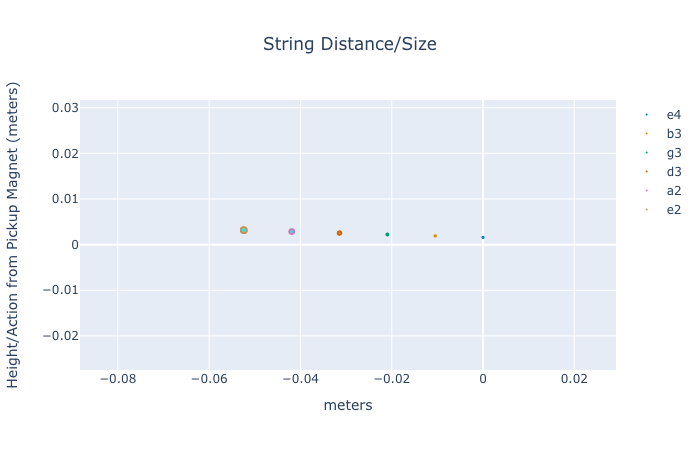

In [90]:
gtr._plot_strings_yz_initial()

<center><h3>Viewing Frequency as Fret Number Increases

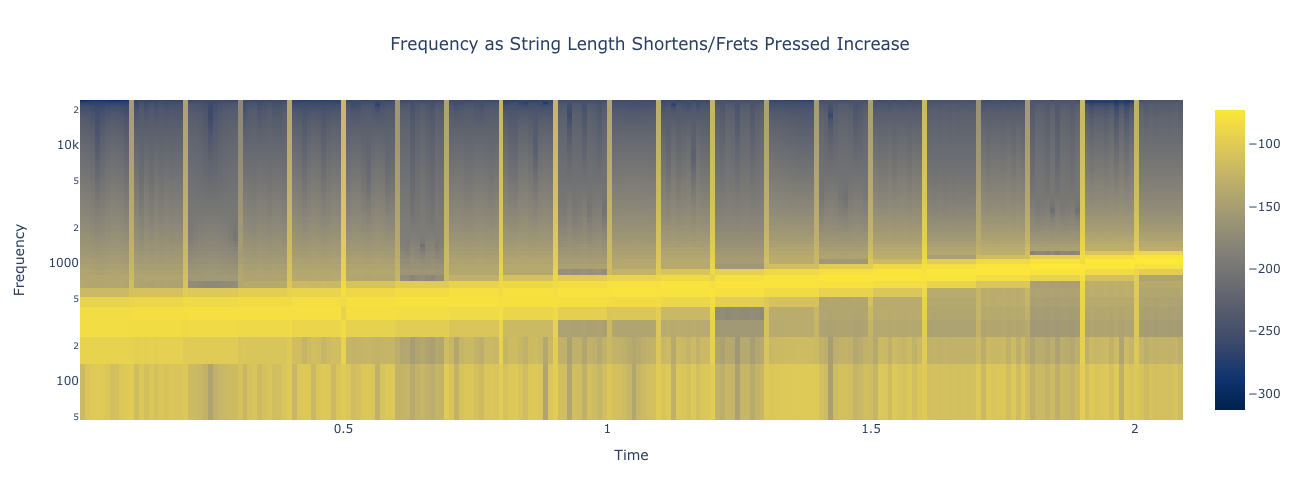

In [91]:
string = gtr.strings[1]

data = np.empty(0)
for fret in range(string.num_of_frets):
    y, z, t = string.pluck(fret,fs=48e3)
    data = np.hstack((data,y))

nh.spectrogram(data,48e3,title='Frequency as String Length Shortens/Frets Pressed Increase')

<center><h3>Viewing the Fret Board

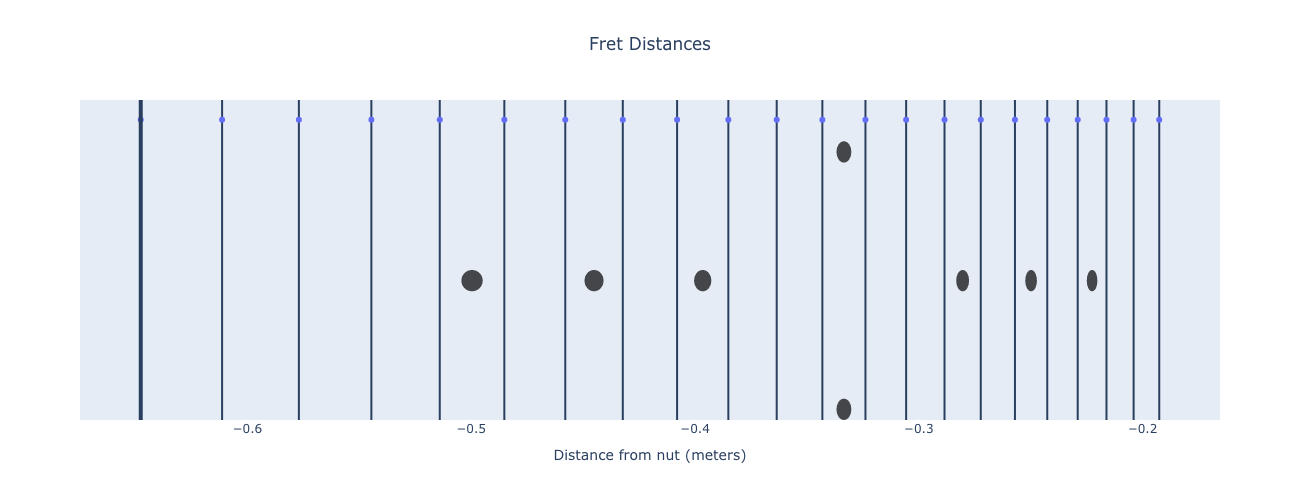

In [92]:
gtr.plot_blank_fretboard(with_strings=False, with_fret_numbers=False)

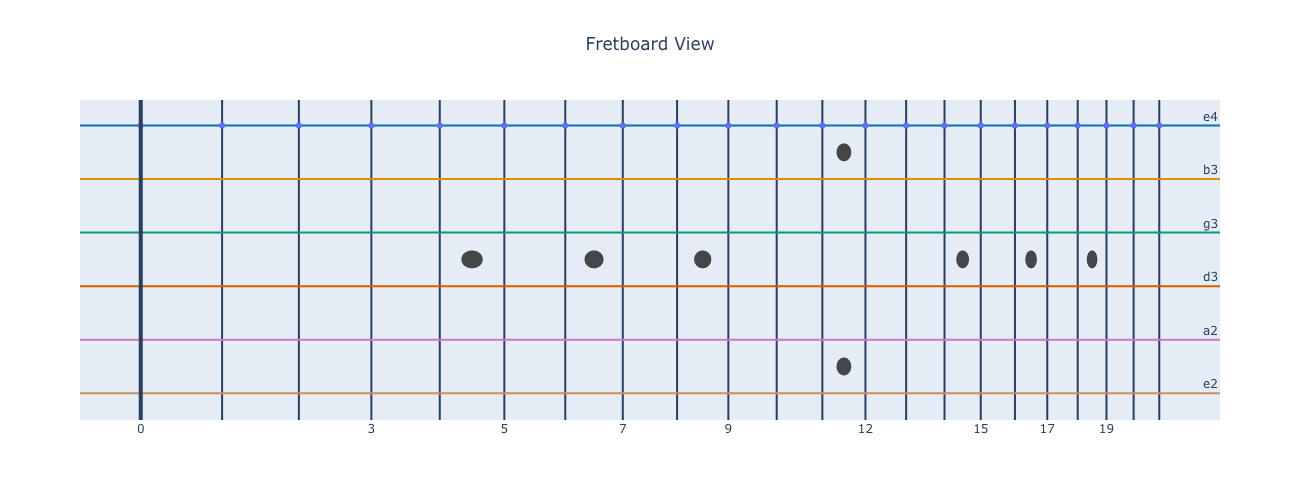

In [99]:
gtr.plot_blank_fretboard()

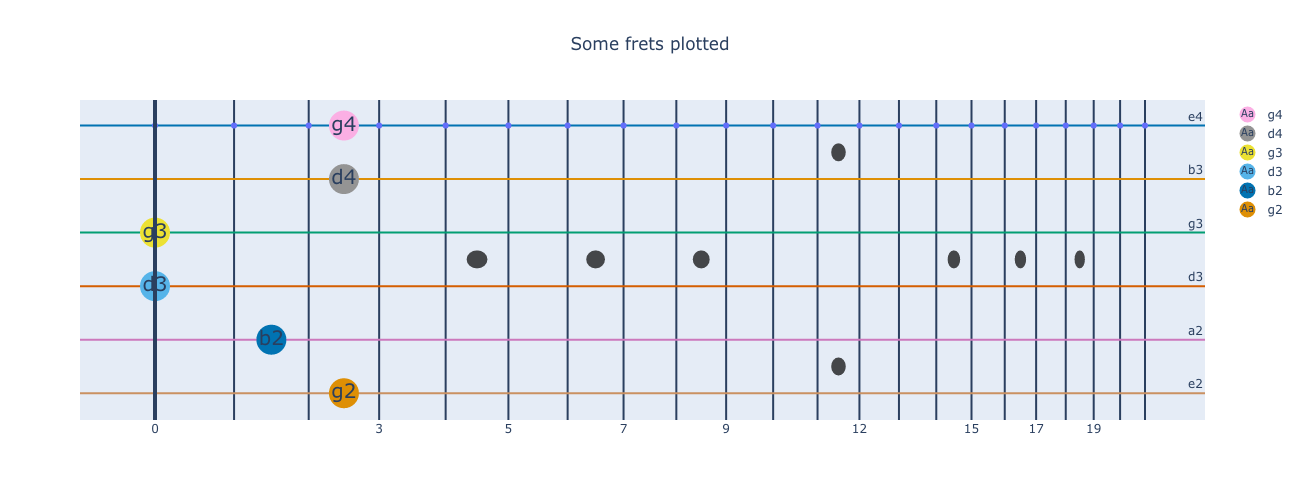

In [100]:
gtr.plot_frets((3,2,0,0,3,3))

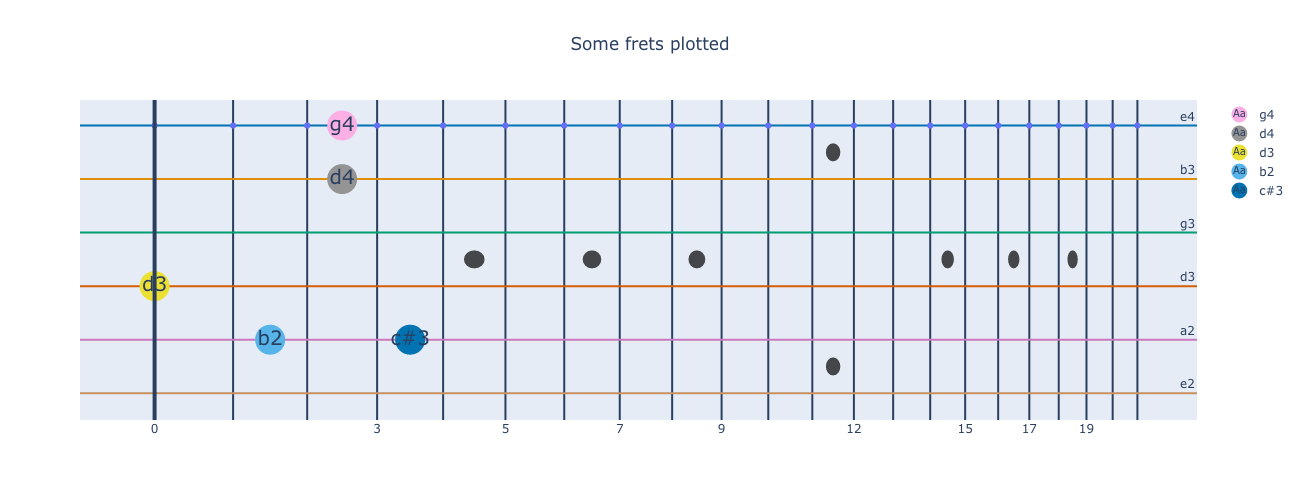

In [101]:
gtr.plot_frets(('',[2,4],0,'',3,3))

<center><h3>Searching Around the Guitar Strings

We can find locations of _notes on the fretboard by using the `find_note` function.  
It accepts either a note as just the note name, or a note in scientific pitch notation.

In [102]:
gtr.find_note('g5')

{1: [15], 2: [20], 3: [], 4: [], 5: [], 6: []}

So at string 1, fret 15, we should expect to see it's the note `g5`

In [103]:
gtr.strings[1].at_fret[15]

note                                             g5
fret                                             15
string_number                                     1
note_name                                         g
note_octave                                       5
frequency_fundamental                       783.991
x_position                                -0.272324
y_position                                        0
position                 [-0.2723243040799152, 0.0]
Name: 15, dtype: object

Also at string 2, fret 20, we should expect to see it's the note `g5`

In [104]:
gtr.strings[2].at_fret[20]

note                                                    g5
fret                                                    20
string_number                                            2
note_name                                                g
note_octave                                              5
frequency_fundamental                              783.991
x_position                                       -0.204013
y_position                                      -0.0104775
position                 [-0.2040127160042271, -0.0104775]
Name: 20, dtype: object

In [105]:
gtr.find_note('g')

{1: [3, 15], 2: [8, 20], 3: [0, 12], 4: [5, 17], 5: [10], 6: [3, 15]}

So at all these string fret combos, we will find some octave of the note `g`  
For example, lets poke string 4, fret 17:

In [106]:
gtr.strings[4].at_fret[17]

note                                                    g4
fret                                                    17
string_number                                            4
note_name                                                g
note_octave                                              4
frequency_fundamental                              391.995
x_position                                       -0.242613
y_position                                      -0.0314325
position                 [-0.2426133734232564, -0.0314325]
Name: 17, dtype: object

<center><h3>Viewing Keys

In [107]:
gtr.keys['a']

note numeral  chord_triad        type        mode
1    a       I   [a, c#, e]       major      ionian
2    b      ii   [b, d, f#]       minor      dorian
3   c#     iii  [c#, e, g#]       minor    phrygian
4    d      IV   [d, f#, a]       major      lydian
5    e       V   [e, g#, b]       major  mixolydian
6   f#      vi  [f#, a, c#]       minor     aeolian
7   g#    viio   [g#, b, d]  diminished     locrian

In [108]:
gtr._search_keys_for_note('b')

['a', 'b', 'c', 'd', 'e', 'f#', 'g']

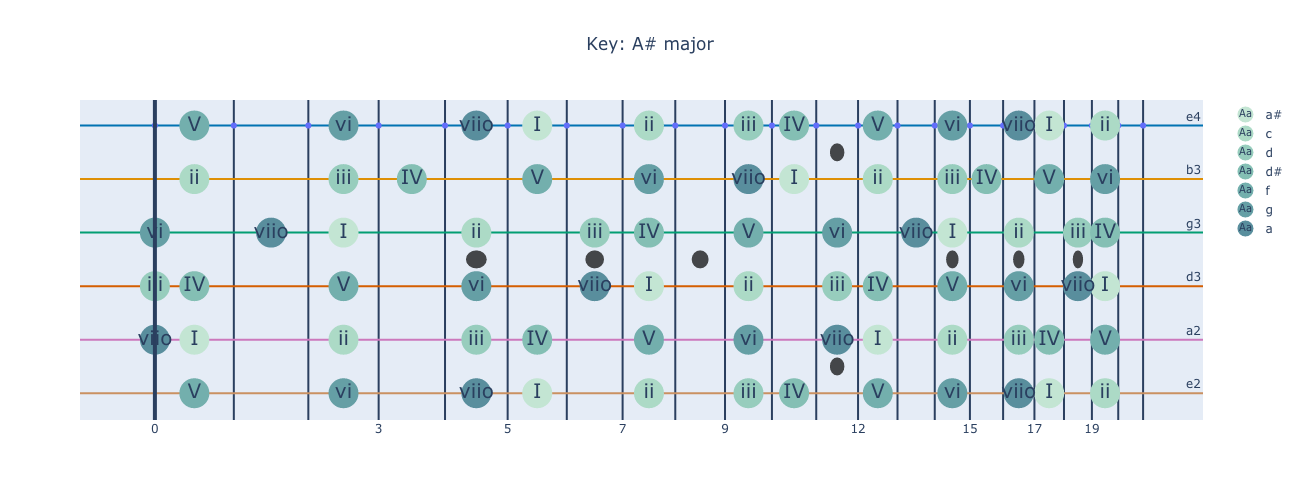

In [109]:
gtr.plot_key(('a#','major'))

<center><h3>Finding Scales

In [110]:
gtr.find_scale(('g','major'))

g        a        b        c        d        e       f#
1  [3, 15]  [5, 17]  [7, 19]  [8, 20]     [10]  [0, 12]  [2, 14]
2  [8, 20]     [10]  [0, 12]  [1, 13]  [3, 15]  [5, 17]  [7, 19]
3  [0, 12]  [2, 14]  [4, 16]  [5, 17]  [7, 19]      [9]     [11]
4  [5, 17]  [7, 19]      [9]     [10]  [0, 12]  [2, 14]  [4, 16]
5     [10]  [0, 12]  [2, 14]  [3, 15]  [5, 17]  [7, 19]      [9]
6  [3, 15]  [5, 17]  [7, 19]  [8, 20]     [10]  [0, 12]  [2, 14]

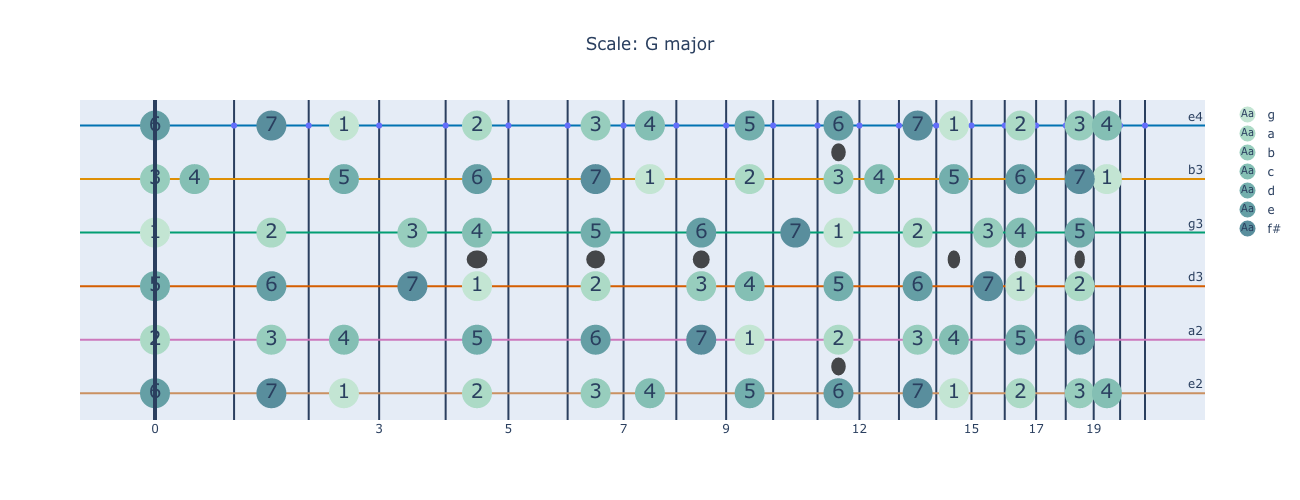

In [111]:
gtr.plot_scale(('g','major'))

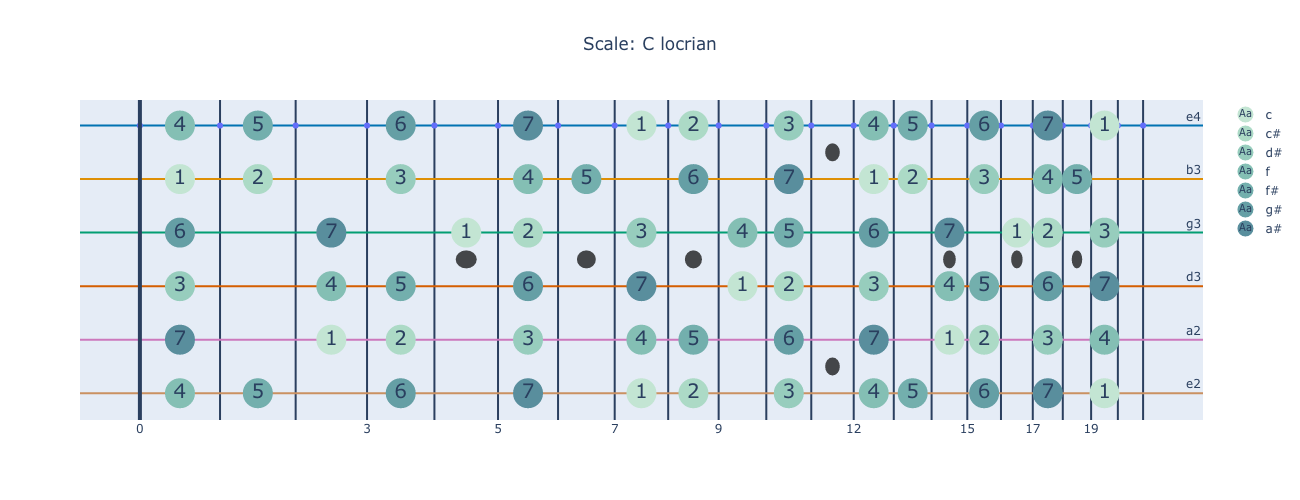

In [112]:
gtr.plot_scale(('c','locrian'))

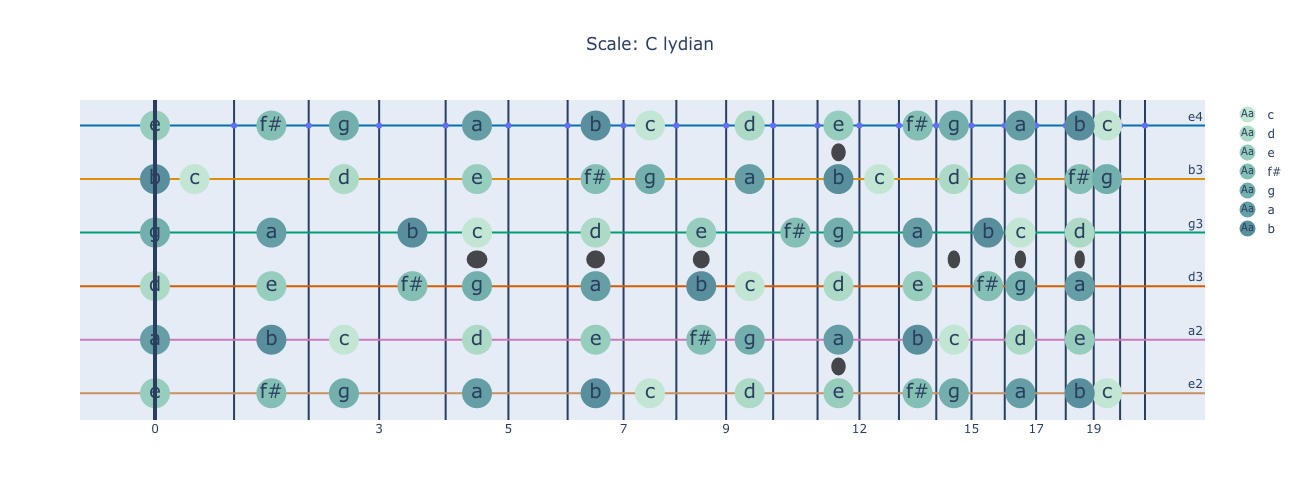

In [113]:
gtr.plot_scale(('c','lydian'), show_as='note')

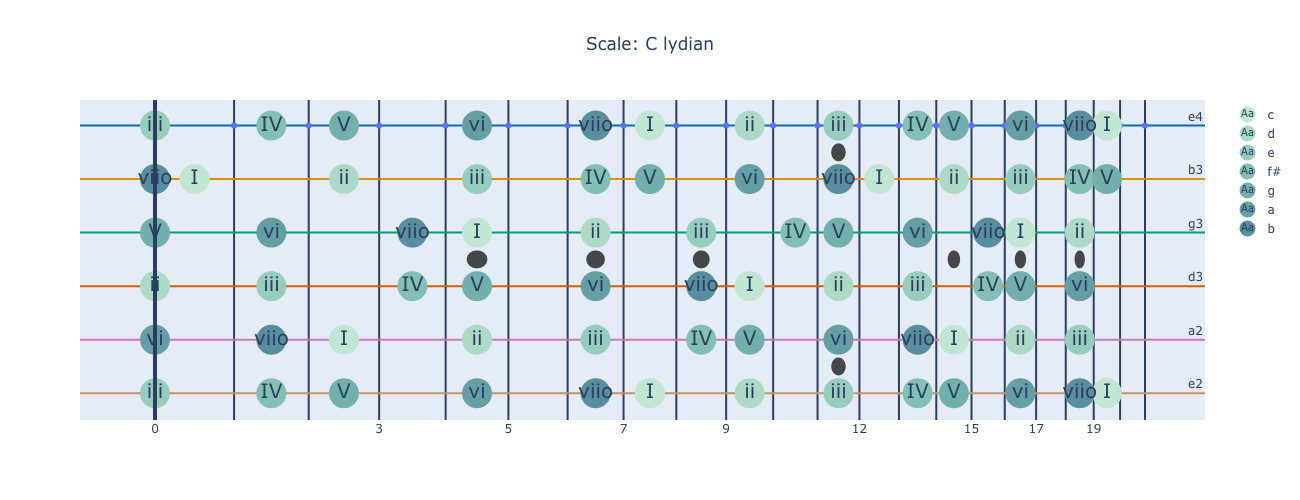

In [114]:
gtr.plot_scale(('c','lydian'), show_as='numeral')

<center><h3>Making Chords for Guitar Strings

the `find_chord` method returns a `Pandas.DataFrame`  
Rows are a string number  
Columns are the _notes in the chord.  
Values are the frets that these _notes are on

In [115]:
gtr.keys['g']

note numeral chord_triad        type        mode
1    g       I   [g, b, d]       major      ionian
2    a      ii   [a, c, e]       minor      dorian
3    b     iii  [b, d, f#]       minor    phrygian
4    c      IV   [c, e, g]       major      lydian
5    d       V  [d, f#, a]       major  mixolydian
6    e      vi   [e, g, b]       minor     aeolian
7   f#    viio  [f#, a, c]  diminished     locrian

In [106]:
gtr.find_chord(('g','major'))

g        b        d
1  [3, 15]  [7, 19]     [10]
2  [8, 20]  [0, 12]  [3, 15]
3  [0, 12]  [4, 16]  [7, 19]
4  [5, 17]      [9]  [0, 12]
5     [10]  [2, 14]  [5, 17]
6  [3, 15]  [7, 19]     [10]

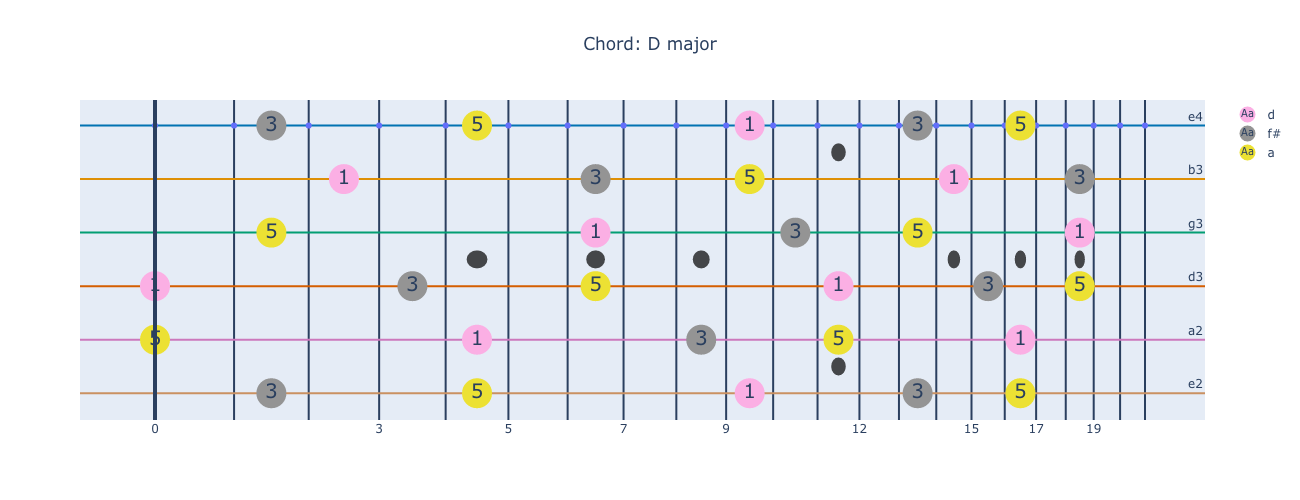

In [116]:
gtr.plot_chord(('d','major')) # lol a minor

<center><h3>Guessing Chords given Frets

<center>Work In Progress

Found possible keys:  {'g', 'c', 'd'}
unique _notes:  ['g', 'd', 'b']
found matching chord! key:  g  chord:  ['g', 'b', 'd']  type:  major  numeral  I
found matching chord! key:  c  chord:  ['g', 'b', 'd']  type:  major  numeral  V
found matching chord! key:  d  chord:  ['g', 'b', 'd']  type:  major  numeral  IV


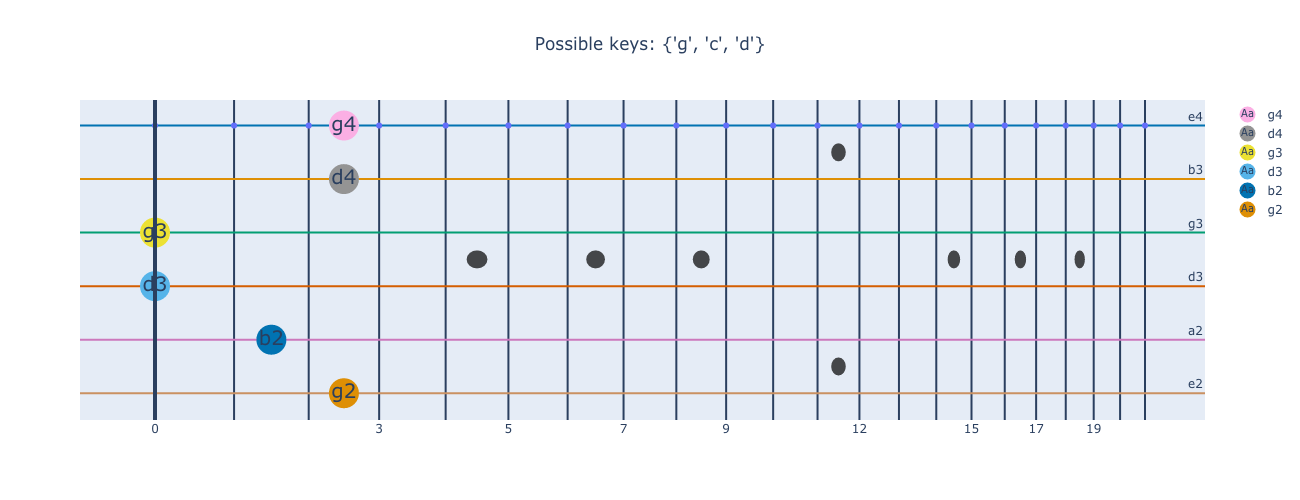

In [117]:
df, pos_chords_df = gtr.guess_chord((3,2,0,0,3,3), plot=True)

In [118]:
df

note  fret  string_number note_name  note_octave  frequency_fundamental  \
3   g4     3              1         g            4             391.995436   
3   d4     3              2         d            4             293.664768   
0   g3     0              3         g            3             195.997718   
0   d3     0              4         d            3             146.832384   
2   b2     2              5         b            2             123.470825   
3   g2     3              6         g            2              97.998859   

   x_position  y_position                                      position  
3   -0.544649    0.000000                    [-0.5446486081598307, 0.0]  
3   -0.544649   -0.010478             [-0.5446486081598307, -0.0104775]  
0   -0.647700   -0.020955              [-0.6476999999999999, -0.020955]  
0   -0.647700   -0.031433             [-0.6476999999999999, -0.0314325]  
2   -0.577035   -0.041910               [-0.5770350997394977, -0.04191]  
3   -0.544649   -0.052388  [-0.5446486081598307, -0.052387500000000004]

In [119]:
pos_chords_df

g2   b2   d3   g3   d4   g4
g2   u  -M3  -P5   -u  -P5   -u
b2  M3    u  -m3  -m6  -m3  -m6
d3  P5   m3    u  -P4   -u  -P4
g3   u   m6   P4    u  -P5   -u
d4  P5   m3    u   P5    u  -P4
g4   u   m6   P4    u   P4    u

Found possible keys:  {'g', 'f', 'c'}
unique _notes:  ['e', 'c', 'a']
found matching chord! key:  g  chord:  ['a', 'c', 'e']  type:  minor  numeral  ii
found matching chord! key:  f  chord:  ['a', 'c', 'e']  type:  minor  numeral  iii
found matching chord! key:  c  chord:  ['a', 'c', 'e']  type:  minor  numeral  vi


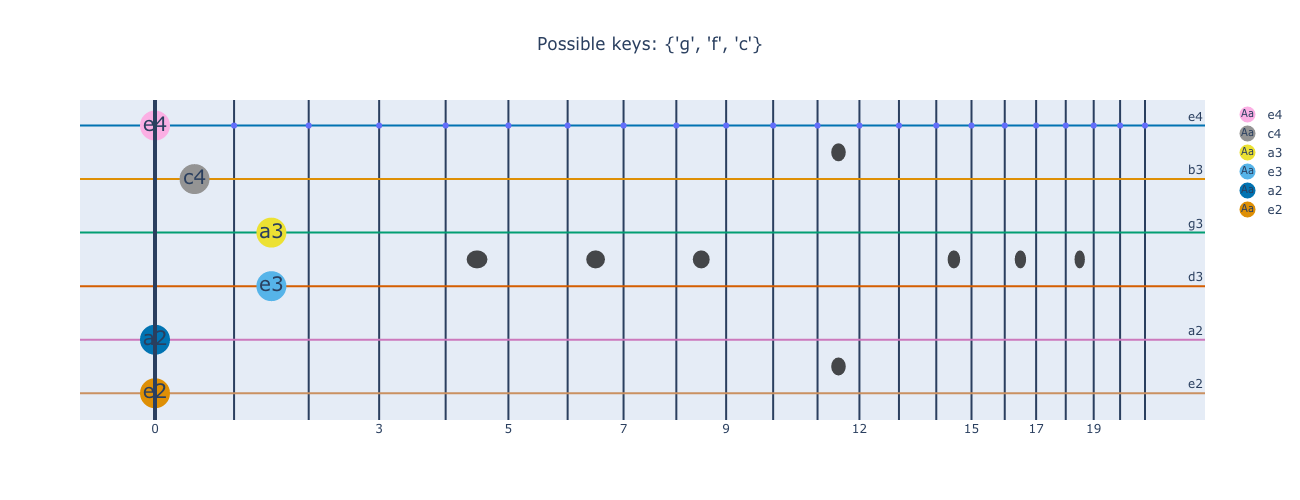

In [120]:
df, pos_chords_df = gtr.guess_chord((0,0,2,2,1,0), plot=True)

Found possible keys:  {'g', 'c'}
unique _notes:  ['g', 'd', 'b', 'c', 'a']


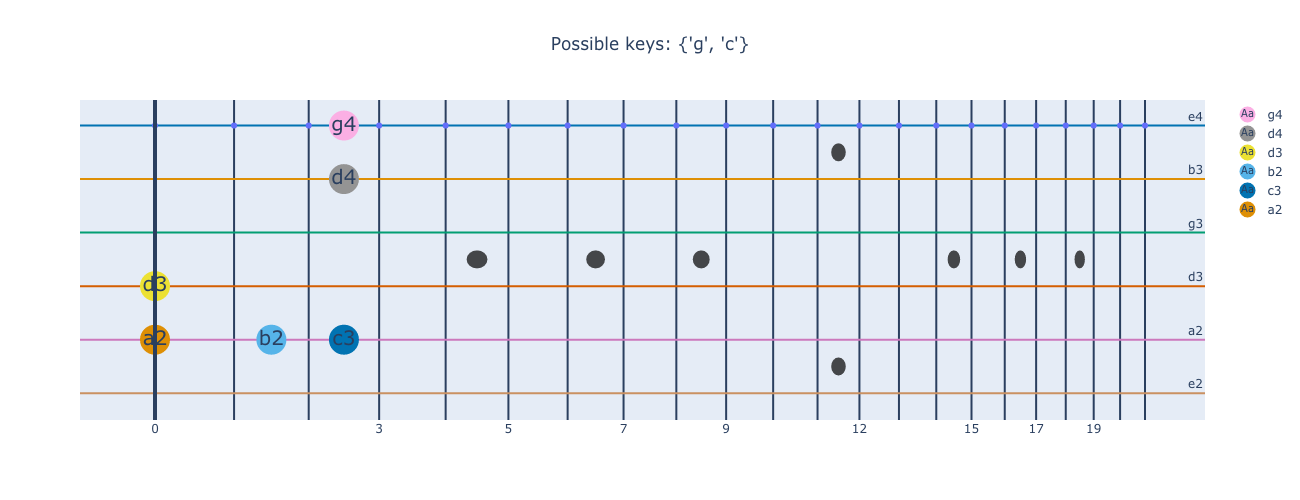

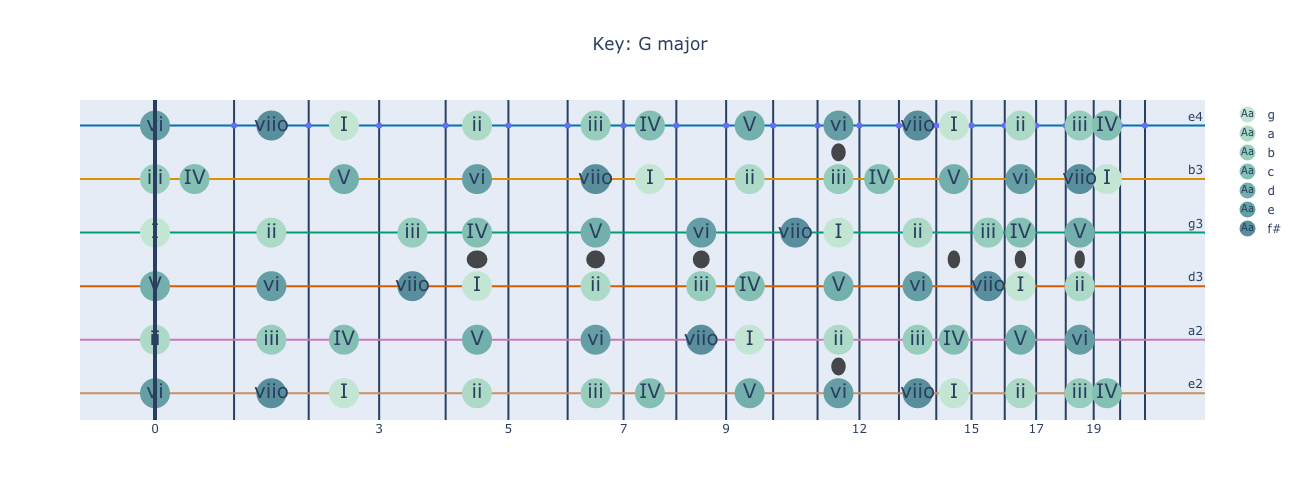

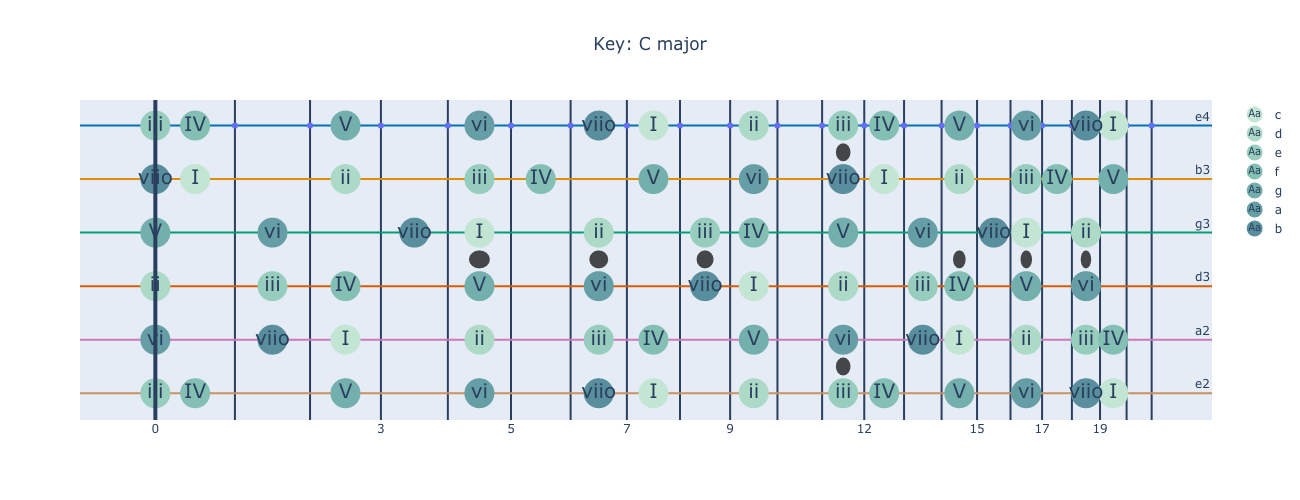

In [121]:
df, pos_chords_df = gtr.guess_chord(('',[2,3,0],0,'',3,3), plot=True, plot_possible_keys=True)

<center><h1>The Pickup

<center><h2>Magnetic Pickup Model

References:  
 - [Dope animation of current induced in pickup windings](https://nationalmaglab.org/education/magnet-academy/watch-play/interactive/guitar-pickup)
 - [Angry professor rants about why this is hard](https://courses.physics.illinois.edu/phys406/sp2017/Lecture_Notes/Guitar_Pickup_Talk/Electronic_Transducers_for_Musical_Instruments.pdf)
 - [long form of string + pickup voltage](http://kirkmcd.princeton.edu/examples/guitar.pdf)

Faraday's Law says (generally) a varying magnetic field is accompanied by a varying electric field.  

Plucking the strings moves the string.  Cool.  
If that string happens to be able to impact a magnetic field, much cooler.  
Now wrap that varying magnetic field in something that carries electric fields/forces, like wire, super cool.  
This fun force is called an electromotive force. Best cool.

We want to deduce how much current/force will be output from this magic pickup


<br>
<center style='font-size:120%'>Solve for:</center> 

|  Variable 	|   Description	|
|---	|---	|
|  ${I}$ 	|   Current from pickup 	|

<br>
<center style='font-size:120%'>Pickup Variables</center> 

| Variable 	| Description 	|
|----------	|-------------	|
|     ${B}$     	|     DC magnetic field from magnet        	|
|     ${N}$     	|      Number of windings about the magnet       	|
|    ${A}$      	|        Area of magnetic field     	|


<br> 
<center style='font-size:120%'>Resultant Variables</center> 

| Variable 	| Description 	|
|----------	|-------------	|
|    ${R}$      	|     Resistance of wire        	|
|    ${L}$      	|    Lump inductance of pickup         	|
|    ${Re}$      	|    Eddy currents induced resistance         	|
|    ${C}$      	|    Lump capacitance of wire         	|

<br>
<center style='font-size:120%'>Lumped Variables</center> 

| Variable 	| Description 	|
|----------	|-------------	|
|    ${Z}$      	|    Lumped impedance of picked         	|

Faraday's Law says:  
>${V}={-{N}\frac{\Delta{\phi}}{\Delta{t}}}$
>>${V}$: Voltage generated  
${N}$: Number of turns of wire  
${t}$: time  
${\phi}$: Magnetic flux   
>>>${\phi}={B}{A}$   
>>>>where:   
${B}$: DC magnetic field from magnet  
${A}$: Area of field  

Solving for current:
> ${I}=\frac {-{N}\frac{\Delta{B}{A}}{\Delta{t}}} {Z}$

<center><h3>Reviewing Magnetics 

magnetic constant, ${\mu}_{0} = {4\pi} {10 ^ {-7}}$ (Tm/A)

${\phi}$: Magnetic Flux  
${B}$: Magnetic Field Vector

Remember:  
 - ${B}$ - Magnetic Flux (Tesla)
 - ${H}$ - Magnetic Field Strength (amps per meter) 
 - Related by: ${H} = \frac {{\mu}_{0}}{B}$  (in a vacuum)
 
For this work, we need to acount for M, the field not in a vacuum.  
**TODO** break this down.   
Eventually you can see:  
${\mu}= {{\mu}_{r}}{{\mu}_{0}}$ where:
 - ${\mu}$ - Overall magnetic permeability 
 - ${\mu}_{r}$ - Relative magnetic permeability of material
 - ${\mu}_{0}$ - Magnetic permeability of free air  

Solving for what we are interested in, magnetic flux, ${B}$ gives:  
${B} = {\mu}{H}$  

So our variable of interest for strings are: 
 - ${\mu}_{r}$ - Governed by the material of the string
 - String gauge - this directly impacts the area, ${A}$ it consumes to impact the magnetic flux, ${\phi}$

Making sense of ${(BH)}_{max}$:  

${(BH)}_{max}$ is the maximum energy a magnet can have when saturated. It looks very similar to a hysteresis loop  
It's related to these properties:  
 - ${B}_{r}$ - Represents how much magnetic flux could be achieved once the magnetizing source is removed. The r seems to be for "remanence" i.e. what's left over
 - ${H}_{c}$ - Represents how strong of a field (as a force) would be needed to de-magnetize the magnet. Called coercive force.
 - ${H}_{ci}$  - Oddly, this is represents the resistance of a magnet to de-magnetiztion. Called intrinsic coercive force. 
    

Making sense of magnetic field, magnetic induction, magnetic flux, and magnetic flux density:  
 - Magnetic Field: 

 - Magnetic Flux: 
   - Symbol: ${\phi}$
   - SI Units: weber, ${W}_{b}$ [wiki](https://en.wikipedia.org/wiki/Magnetic_flux)
   - this is the flow of the magnetic field, so to describe this you need the area or size you care to describe. Denoted in units of Maxwell.
 - Magnetic Flux Density: 
   - Symbol: ${B}$
   - SI Units: Tesla, ${T}$ [wiki](https://en.wikipedia.org/wiki/Tesla_(unit))
   - Aliases: Magnetic Induction, Magnetic field (ambiguous)
   - This is how much flux is trying to squeeze through an area.
   - As mentioned above with ${B}_{r}$, it is the field induced by ${H}$


A unit of Tesla is:  
${T} = \frac {N}{{m}{A}}$
where:
 - ${T}$ - Telsa
 - ${N}$ - Newton
 - ${m}$ - meter
 - ${A}$ - amp  
  
or    
   
${T} = \frac {{W}_{b}} {{m}^{2}} $
where:
 - ${T}$ - Telsa
 - ${W}_{b}$ - Weber
 - ${m}$ - meter  
 
or in SI base units:

${T} = \frac {kg} {{A}{{s}^{2}}} $
where:
 - ${T}$ - Telsa
 - ${kg}$ - kilogram
 - ${A}$ - amps
 - ${s}$ - seconds

<center><h3>Pickup Magnet Field Density (Tesla)

References:  
 - [Pole Magnets for Guitar Pickups](https://www.stewmac.com/electronics/pickup-kits-and-parts/pickup-parts-for-strat/alnico-5-polepiece-magnets.html)
  - Length varies:
    - Strats with staggered:  
      - B string -  16.51mm
      - A and both E strings - 17.04mm
      - D and G strings - 18.03mm
    - Strats 70s
      - Same - 17.04mm
    - Teles with staggered (bridge):
      - A, B and both E's - 16.00mm
      - D and G - 17.48mm
    - Teles (neck):
      - Same: 16.00mm
 -  [Alnico Magnets Wiki](https://en.wikipedia.org/wiki/Alnico)
 -  [Magnet terms glossary](https://www.kjmagnetics.com/glossary.asp)
 -  [Orders of magnitude of magnetic fields (w/ examples)](https://en.wikipedia.org/wiki/Orders_of_magnitude_(magnetic_field))

Alnico  
 - [Alnico Magnetic Flux](https://www.liltreesguitars.com/advanced/magnet-types/)  
  - These values don't follow logic, lower alnico number should be lower T?  
  - 2: 98mT
  - 3: 77mT
  - 5: 140mT
 - [Seems better](https://alexkenis.wordpress.com/2015/10/29/properties-of-alnico-magnet-guitar-pickup-pole-pieces/comment-page-1/)  
 

 - Alnico is composed of iron plus aluminum, nickel, cobalt  
   - its al for aluminum
   - ni for nickel
   - co for cobalt
   - put it all together and you get alnico!

Source for below values: [seymour duncan](https://www.seymourduncan.com/blog/swd/what-is-the-gauss-force-oersteds-and-maximum-energy-of-various-magnets-dr-nick-toth-bloomington-indiana)


In [74]:
# magnet material: [millitesla, oersteds, BHmax]
noodler.pickup_magnetics.magnets

{'alnico_1': [720, 470, 1.4],
 'alnico_2': [750, 560, 1.7],
 'alnico_3': [700, 480, 1.35],
 'alnico_4': [560, 720, 1.35],
 'alnico_5': [1280, 640, 5.5]}

TODO Where did these values come from?

In [69]:
magnet_strength = 12700 #mT
magnet_strength = 150 #mT
pole_magnet_length = np.array([17.04,17.04,18.03,18.03,16.51,17.04]) #mm
pole_magnet_diameter = 4.95  #mm
dist_between_magnets = 10.4775 #mm
pickup = noodler.pickup_magnetics.create_pickup_magnets(magnet_strength, pole_magnet_diameter, pole_magnet_length, dist_between_magnets)

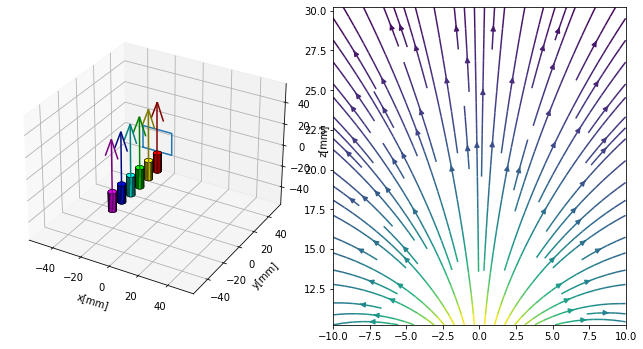

In [71]:
noodler.pickup_magnetics.plot_mags(pickup)

/Users/andrewfarrell/Documents/_notes/notebooks/music_and_guitar_modeling/src/noodler/pickup_magnetics.py:128: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



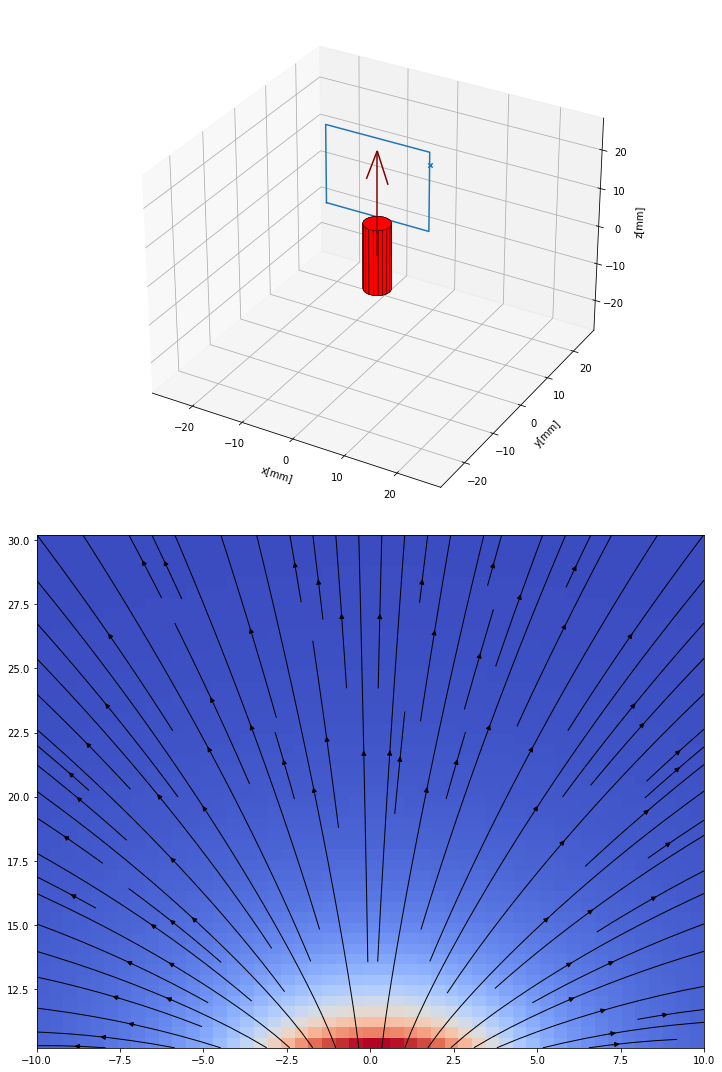

In [72]:
noodler.pickup_magnetics.plot_indv_mag(pickup.sources[0])

Getting the magnetic field is as simple as calling the `getB` function and providing it a coordinate as a tuple (x,y,z) in mm:

In [149]:
pickup.getB((0,0,0))

array([  0.        ,   0.        , 141.88965764])

You can also query the individual magnetic fields of each magnet:

In [150]:
pickup.sources[0].getB((0,0,0))

array([  0.      ,   0.      , 144.045361])

Looking at how much magnetic force is seen per string using the string offsets above

In [151]:
dist=10.4775
for idx, action in enumerate(action_per_string):
    print(pickup.getB((0,idx*dist,action)))
#     print(pickup.sources[0].getB((0,idx*dist,action)))

[6.47387675e-20 1.05726431e-03 1.41889656e+02]
[ 5.83270161e-20  9.52552460e-04 -2.16355659e+00]
[ 9.11267088e-21  1.48821209e-04 -5.60677363e-01]
[ 2.25079446e-21  3.67582630e-05 -2.24027098e-01]
[ 7.54629078e-22  1.23240281e-05 -1.13899370e-01]
[ 2.99713906e-22  4.89469953e-06 -6.66404023e-02]


So about 11800mT is seen per string

<center><h3>Verifying magpylib's results:</center></h3>

Reference:
 - [Below formulas derivation (pg 39)](https://www.tokin.com/english/product/pdf_dl/permanentmagnets.pdf)

In [152]:
B = 350
L = 5
R = 2
Z = 4

Bz = (B/2) * ( ((L+Z)/np.sqrt(R**2 + (L+Z)**2)) - (Z / np.sqrt(R**2 + Z**2)) )

from magpylib.magnet import Cylinder
s = Cylinder( mag = [0,0,B], dim = [R*2,L])

magpy_Bz = s.getB([0,0,Z+(L/2)])
print('Bz {:}, magpy_Bz {:}'.format(Bz, magpy_Bz))

np.allclose(Bz,magpy_Bz[2])

Bz 14.307977107206474, magpy_Bz [ 0.          0.         14.30797711]


True

<center><h3>Make the <code>Pickup_Magnetics</code> Class

In [153]:
class Pickup_Magnetics:
    def __init__(
        self,
        name=None,
        magnet_material=None,
        B=0.150,
        diameter=0.00495,
#         length=np.tile(0.01704,6),
        length=np.array([0.01704,0.01704,0.01803,0.01803,0.01651,0.01704]),
        distance_between_magnets=0.0104775,
        distance_between_bridge_and_pickup=0.029,
        num_of_magnets=6,
    ):
        '''
        creates pickup magnetics with the given properties
        
        TODO bad naming needs cleaned up
        '''
        self.name = name
        
        self.distance_between_magnets = distance_between_magnets
        self.num_of_magnets = num_of_magnets
        
        self.distance_between_bridge_and_pickup = distance_between_bridge_and_pickup
        self.x_position = self.distance_between_bridge_and_pickup
        
        self.make_magnets(magnet_material, B, diameter, length, self.num_of_magnets, self.distance_between_magnets)
        
    def make_magnets(self, magnet_material, B, diameter, length, num_mags, dist):
        from magpylib.magnet import Cylinder
        from magpylib import Collection
        import numpy as np
        
        if not hasattr(B,'__iter__'):
            B = [B]*num_mags

        if not hasattr(diameter, '__iter__'):
            diameter = [diameter]*num_mags

        if not hasattr(length, '__iter__'):
            length = [length]*num_mags
        
        diameter_in_mm = np.array(diameter)*1e3
        length_in_mm = np.array(length)*1e3
        B_in_mT = np.array(B)*1e3
        
        print('length_in_mm ',length_in_mm)
        print('diameter_in_mm ',diameter_in_mm)
        print('B_in_mT ',B_in_mT)
        
    #     print('B[0] {:}, diameter[0] {:}, length[0] {:}'.format(B[0], diameter[0], length[0]))
        mag = Cylinder(mag=(0,0,B_in_mT[0]), dim=(diameter_in_mm[0],length_in_mm[0]))
        c = Collection(mag)
        for idx in range(num_mags-1):
            mag = Cylinder(mag=(0,0,B_in_mT[idx+1]), dim=(diameter_in_mm[idx+1],length_in_mm[idx+1]))
            mag.move((0,-dist*(idx+1),0))
            c.addSources(mag)
        self.magnets = c

In [154]:
def _make_pickup_magnetics(self, distance_between_bridge_and_pickup = 0.029):
    self.pickup_magnetics = Pickup_Magnetics(
        distance_between_magnets = self.dist_between_strings,
        distance_between_bridge_and_pickup = distance_between_bridge_and_pickup,
        num_of_magnets = self.num_of_strings,
    )

def plot_indv_mag(self, mag_num, string_number=None, show_mag_field_direction=True,from_string_perspective=True):
    import numpy as np
    import magpylib as magpy
    import matplotlib.pyplot as plt
    from magpylib import displaySystem
    import seaborn as sns

    s = self.pickup_magnetics.magnets.sources[mag_num]
    
    if string_number is None:
        string_number = mag_num+1

    mag_height = s.dimension[1]
    window_length = s.position[1] + (mag_height*2)

    if from_string_perspective:
        string_center = mag_height+(self.strings[string_number].z_position*1e3)
    else:
        string_center=0
        
    x_d = [-10,10]
    y_d = self.strings[string_number].y_position*1e3
    z_d = [-10+string_center,10+string_center]

    fig1 = plt.figure(figsize=(10, 15))
    axsA = fig1.add_subplot(2,1,1, projection='3d')
    axsB = fig1.add_subplot(2,1,2)

    # position grid
    xs = np.linspace(x_d[0],x_d[1],50)
    zs = np.linspace(z_d[0],z_d[1],50)
    posis = np.array([(x,y_d,z) for z in zs for x in xs])
    X,Y = np.meshgrid(xs,zs)

    # for i,s in enumerate(c.sources):
    # display system on respective axes, use marker to zoom out
    magpy.displaySystem(s,subplotAx=axsA,markers=[(10,0,mag_height+10)],suppress=True,direc=show_mag_field_direction)
    axsA.plot([x_d[0],x_d[1],x_d[1],x_d[0],x_d[0]],[y_d,y_d,y_d,y_d,y_d],[z_d[0],z_d[0],z_d[1],z_d[1],z_d[0]])

    # plot field on respective axes
    B = np.array([s.getB(p) for p in posis]).reshape(50,50,3)
#     cmap = sns.color_palette("rocket", as_cmap=True)
    cmap = plt.cm.get_cmap('coolwarm')
    cs = axsB.pcolor(X,Y,np.linalg.norm(B,axis=2),cmap=cmap, shading='auto')   # amplitude
    axsB.streamplot(X, Y, B[:,:,0], B[:,:,2], color='k',linewidth=1)      # field lines
    fig1.colorbar(cs)

    plt.show()


import types
gtr._make_pickup_magnetics = types.MethodType( _make_pickup_magnetics, gtr )
gtr.plot_indv_mag = types.MethodType( plot_indv_mag, gtr )

In [155]:
gtr._make_pickup_magnetics()

length_in_mm  [17.04 17.04 18.03 18.03 16.51 17.04]
diameter_in_mm  [4.95 4.95 4.95 4.95 4.95 4.95]
B_in_mT  [150. 150. 150. 150. 150. 150.]


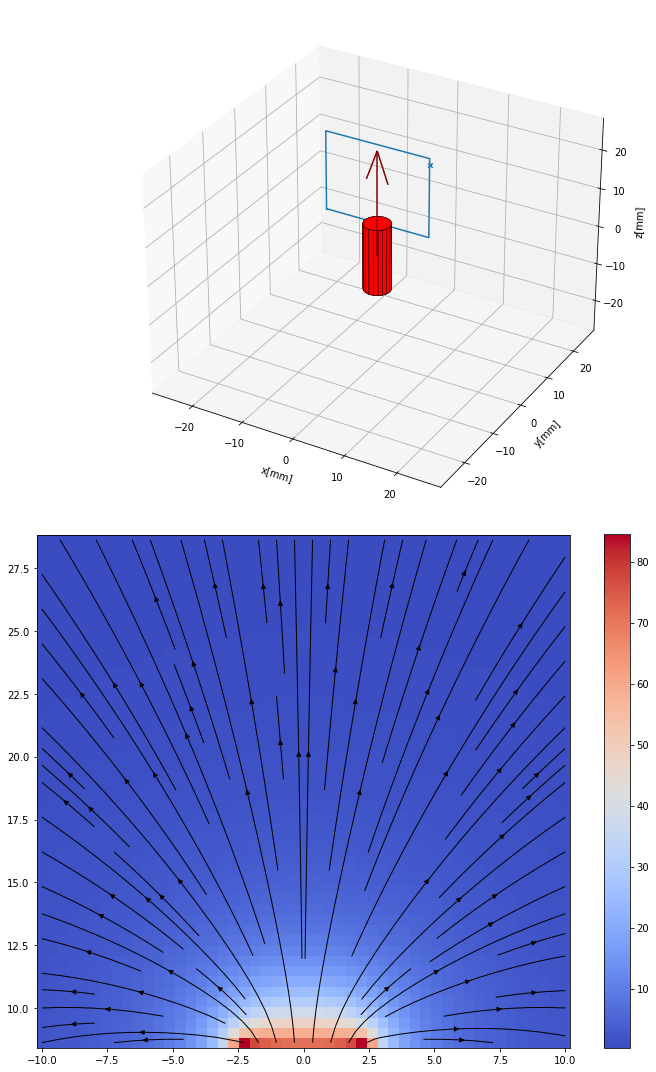

In [156]:
gtr.plot_indv_mag(0)

In [157]:
gtr.pickup_magnetics.magnets.sources[1]

type: magnet.Cylinder 
 magnetization: x: 0.0, y: 0.0, z: 150.0 
 dimensions: d: 4.95, h: 17.04 
 position: x: 0.0, y:-0.0104775, z: 0.0 
 angle: 0.0 
 axis: x: 0.0, y: 0.0, z:1.0

In [158]:
pickup.sources[0]

type: magnet.Cylinder 
 magnetization: x: 0.0, y: 0.0, z: 150.0 
 dimensions: d: 4.95, h: 17.04 
 position: x: 0.0, y:0.0, z: 0.0 
 angle: 0.0 
 axis: x: 0.0, y: 0.0, z:1.0

---

<center><h2>Electrical Pickup Model

In [159]:
class Pickup_Electrical():
    def __init__(self, name):
        import numpy as np
        self.name = name
        self.L = 2.5
        self.Rp = 15e3
        self.C = 120e-12
        self.R_eddy = 200e3
        self._make_circuit_model()
        
        self.freqs_of_interest = np.logspace(0,np.log10(20000),200)
        
    def _make_circuit_model(self):
        from lcapy import Circuit
        import warnings
        warnings.filterwarnings('ignore')
        
        self.circuit_model=Circuit()
        self.circuit_model.add('L1 0_1 1 {:};right'.format(self.L))
        self.circuit_model.add('R_eddy 1 1_1 {:};down'.format(self.R_eddy))
        self.circuit_model.add('W 0 1_1;right')

        self.circuit_model.add('L2 1 2 {:};right'.format(self.L))
        self.circuit_model.add('R_pickup 2 3 {:};right'.format(self.Rp))
        self.circuit_model.add('C_pickup 3 3_1 {:};down'.format(self.C))
        self.circuit_model.add('W 1_1 3_1;right')

    def draw(self):
        self.circuit_model.draw()
        
    def plot_impedance_vs_frequency(self):
        from lcapy import f
        from notebook_helpers import log_plot
        ##what the controls see
        log_plot(self.circuit_model.oneport(Np='3',Nm='3_1').Z(f).evaluate(self.freqs_of_interest))
        ## what the "strings" see
        log_plot(self.circuit_model.oneport(Np='0_1',Nm='0').Z(f).evaluate(self.freqs_of_interest))
    

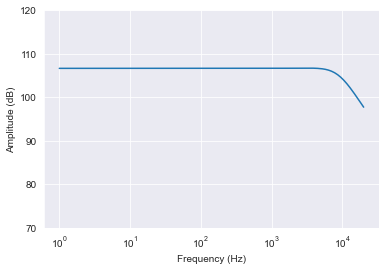

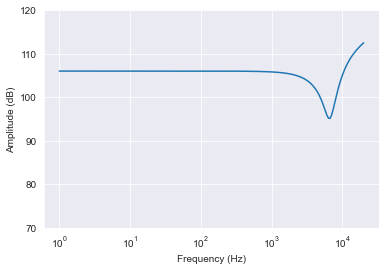

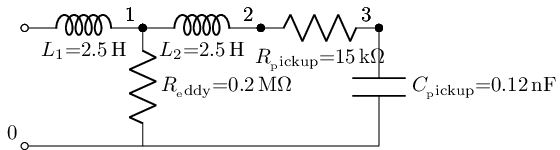

In [160]:
pickup = Pickup_Electrical('test')
pickup.plot_impedance_vs_frequency()
pickup.draw()